# **10 - Feature Selection Techniques House Price Prediction**


Method 1: Correlation Heatmap

Method 2: VIF

Method 3: Variance Threshold

Method 4: SelectKBest

Method 5: ExtraTreesRegressor

Method 6: Mutual Information Gain

Method 7: Recursive Feature Elimination

Method 8: Forward Feature selection

Method 9: Backward elimination 

Method 10: Bidirectional/ Stepwise feature elimination


In [35]:
from sklearn import svm
from sklearn import metrics
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import matplotlib.pylab as pylab
import warnings
import pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile
%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
#For setting the charts size globally
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'legend.title_fontsize':'x-large'}
pylab.rcParams.update(params)

In [6]:
Train=pd.read_csv("train_house_price_prediction.csv")
Test=pd.read_csv("test_house_price_prediction.csv")

In [7]:
print(Train.shape)
print(Test.shape)

(1460, 81)
(1459, 80)


In [8]:
Train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [9]:
Train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Checking Missing values percentage

In [11]:
# Number of of null values in each column
count=round(Train.isnull().sum(),2)
percent=round((Train.isnull().sum()/Train.shape[0])*100,2)
data=pd.concat([count,percent],axis=1)
data.reset_index(inplace=True)
data.rename(columns={0: 'Missing Values Count',1: 'Missing Values %'},inplace=True)
data[data['Missing Values Count']!=0]

index  Missing Values Count  Missing Values %
3    LotFrontage                   259             17.74
6          Alley                  1369             93.77
25    MasVnrType                     8              0.55
26    MasVnrArea                     8              0.55
30      BsmtQual                    37              2.53
31      BsmtCond                    37              2.53
32  BsmtExposure                    38              2.60
33  BsmtFinType1                    37              2.53
35  BsmtFinType2                    38              2.60
42    Electrical                     1              0.07
57   FireplaceQu                   690             47.26
58    GarageType                    81              5.55
59   GarageYrBlt                    81              5.55
60  GarageFinish                    81              5.55
63    GarageQual                    81              5.55
64    GarageCond                    81              5.55
72        PoolQC                  1453             99.52
73         Fence                  1179             80.75
74   MiscFeature                  1406             96.30

Alley, PoolQC, Fence, MiscFeature columns can be dropped as they have more than 80% of nulls in respective columns

### Checking for duplicate records

In [12]:
# No duplicates.
Train.duplicated().sum()

0

### Checking for unique values count in each column

In [13]:
#How many unique values are present in each column
features=Train.columns
print("Number of unique values are as below:\n")
for i in features:
  uniqueValues=Train[i].nunique()
  uniqueValues_per=round(Train[i].nunique()/Train.shape[0],2)
  print(i,uniqueValues)

Number of unique values are as below:

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 110
LotArea 1073
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
MasVnrArea 327
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 637
BsmtFinType2 6
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 5
GarageType 6
GarageYrBlt 97
GarageFinish 3
GarageCars 5
GarageArea 441
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea

### Dropping variables obtained from above observations

In [14]:
#dropping variables obtained from abov observations as they are not useful
dropColList=['Alley', 'PoolQC', 'Fence', 'MiscFeature','Id']
Train.drop(dropColList,axis=1,inplace=True)
Test.drop(dropColList,axis=1,inplace=True)

In [15]:
print(Train.shape)
print(Test.shape)

(1460, 76)
(1459, 75)


# Univariate Analysis

In [16]:
# Mean and Median are almost same
Train.describe(include = 'all').T

count unique     top  freq     mean      std    min     25%  \
MSSubClass     1460    NaN     NaN   NaN  56.8973  42.3006     20      20   
MSZoning       1460      5      RL  1151      NaN      NaN    NaN     NaN   
LotFrontage    1201    NaN     NaN   NaN    70.05  24.2848     21      59   
LotArea        1460    NaN     NaN   NaN  10516.8  9981.26   1300  7553.5   
Street         1460      2    Pave  1454      NaN      NaN    NaN     NaN   
...             ...    ...     ...   ...      ...      ...    ...     ...   
MoSold         1460    NaN     NaN   NaN  6.32192  2.70363      1       5   
YrSold         1460    NaN     NaN   NaN  2007.82   1.3281   2006    2007   
SaleType       1460      9      WD  1267      NaN      NaN    NaN     NaN   
SaleCondition  1460      6  Normal  1198      NaN      NaN    NaN     NaN   
SalePrice      1460    NaN     NaN   NaN   180921  79442.5  34900  129975   

                  50%      75%     max  
MSSubClass         50       70     190  
MSZoning          NaN      NaN     NaN  
LotFrontage        69       80     313  
LotArea        9478.5  11601.5  215245  
Street            NaN      NaN     NaN  
...               ...      ...     ...  
MoSold              6        8      12  
YrSold           2008     2009    2010  
SaleType          NaN      NaN     NaN  
SaleCondition     NaN      NaN     NaN  
SalePrice      163000   214000  755000  

[76 rows x 11 columns]

### Separating Numerical and categorical features for plotting the data

In [17]:
#separating Numerical and categorical variables
NumericData=Train.select_dtypes(include=['float64','int64'])
rows,col=(NumericData.shape)
print("Number of Numeric columns are:",col)
print(NumericData.columns)

Number of Numeric columns are: 37
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [18]:
#separating Numerical and categorical variables
CategoricData=Train.select_dtypes(include=['object','category'])
rows,col=(CategoricData.shape)
print("Number of Categorical columns are:",col)
print(CategoricData.columns)

Number of Categorical columns are: 39
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


## Univariate Analysis Plots for categorical data

In [19]:
CategoricData.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      CollgCr       Norm       Norm  ...          Gd        Typ         NaN   
1      Veenker      Feedr       Norm  ...          TA        Typ          TA   
2      CollgCr       Norm       Norm  ...          Gd        Typ          TA   
3      Crawfor       Norm       Norm  ...          Gd        Typ          Gd   
4      NoRidge       Norm       Norm  ...          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 39 columns]

In [20]:
#melting the dataframe to bring the data into single column
ConvertedCatDataMelt=CategoricData.melt()
ConvertedCatDataMelt

variable   value
0           MSZoning      RL
1           MSZoning      RL
2           MSZoning      RL
3           MSZoning      RL
4           MSZoning      RL
...              ...     ...
56935  SaleCondition  Normal
56936  SaleCondition  Normal
56937  SaleCondition  Normal
56938  SaleCondition  Normal
56939  SaleCondition  Normal

[56940 rows x 2 columns]

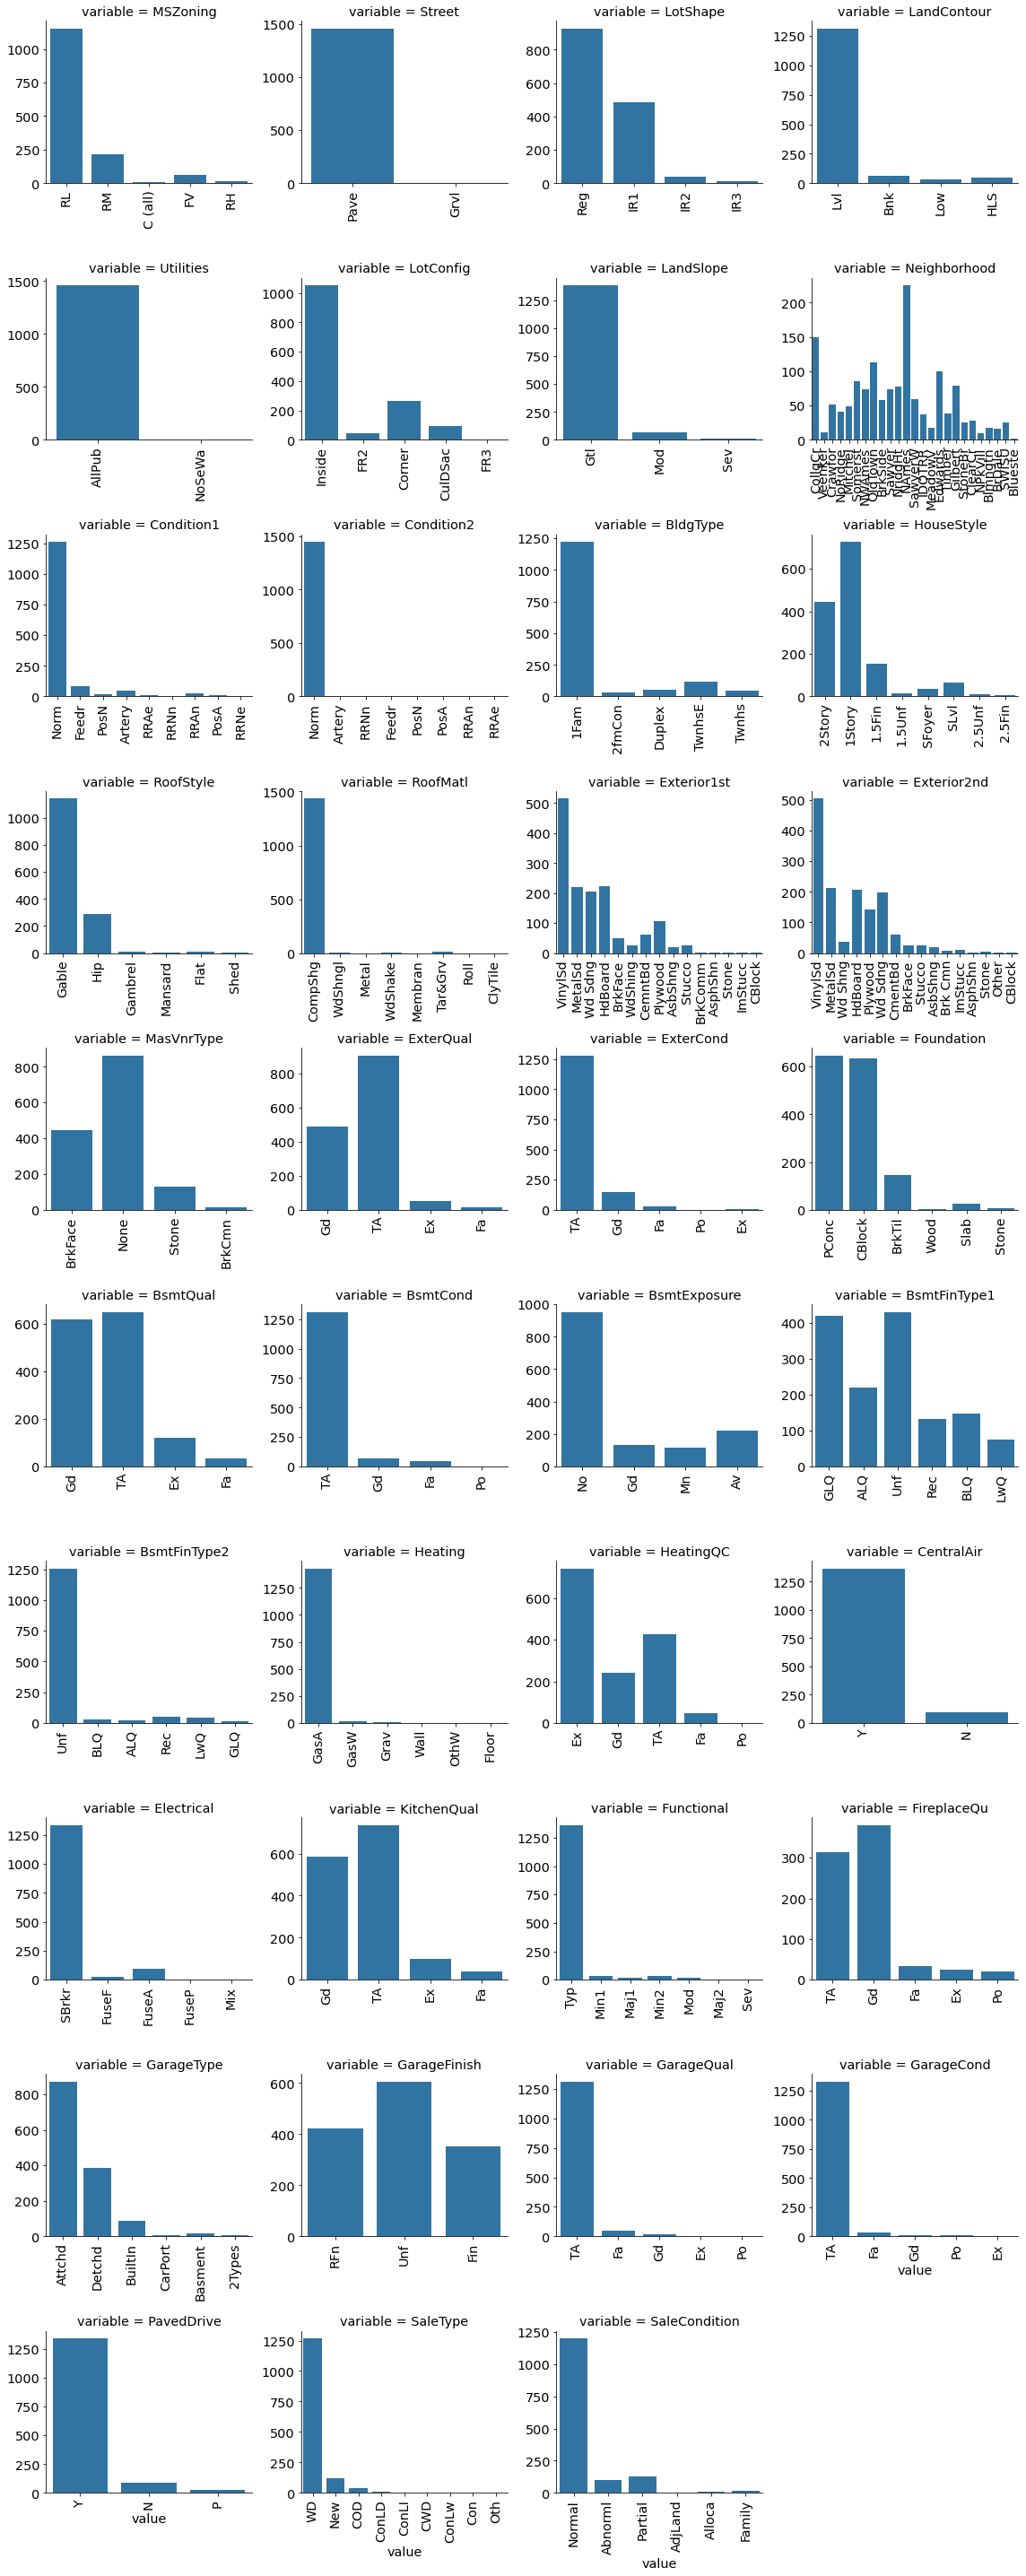

In [21]:
#Univariate Analysis for CountPlot for categorical variables
CatFacetGrid = sns.FacetGrid(ConvertedCatDataMelt, col='variable',sharex=False, dropna=True, sharey=False, size=4,col_wrap=4)
CatFacetGrid.set_xticklabels(rotation=90)
countPlot=CatFacetGrid.map(sns.countplot,'value')
plt.show()

'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Bedroom','Kitchen','KitchenQual','TotRmsAbvGrd',
'Fireplaces','GarageType','MiscVal','MoSold','YrSold' variables are in int64/float64 type, but they can be treated as categorical. Below are the bar plots for the same

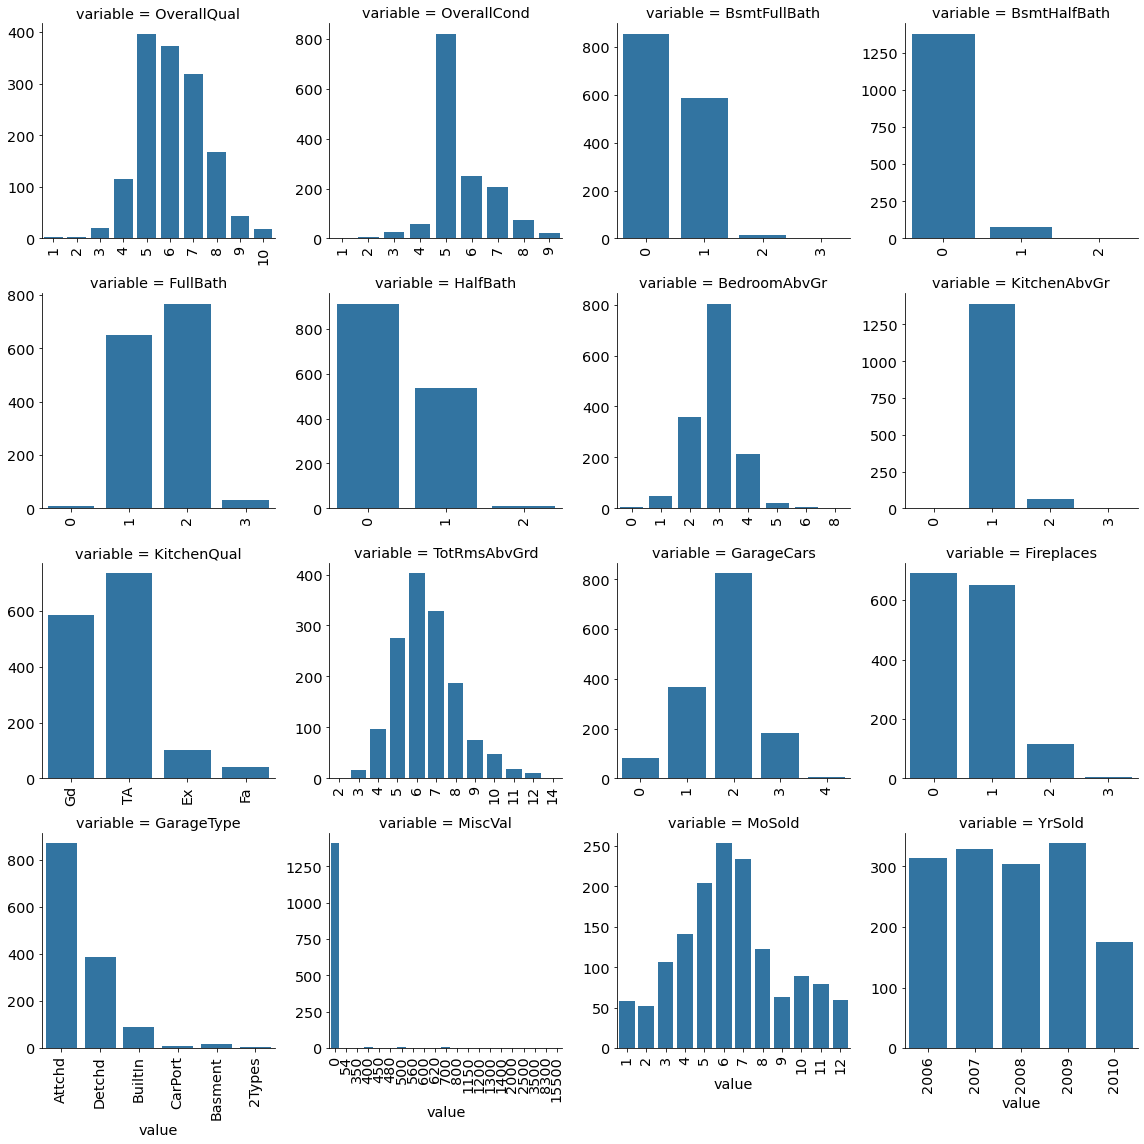

In [22]:
#melting the dataframe to bring the data into single column
CategoricalConData=Train[['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','GarageCars',
'Fireplaces','GarageType','MiscVal','MoSold','YrSold']].copy()

CategoricalConDataMelt=CategoricalConData.melt()

#Univariate Analysis for CountPlot for categorical variables
CatFacetGrid = sns.FacetGrid(CategoricalConDataMelt, col='variable',sharex=False, dropna=True, sharey=False, size=4,col_wrap=4)
CatFacetGrid.set_xticklabels(rotation=90)
countPlot=CatFacetGrid.map(sns.countplot,'value')
plt.show()


## Univariate Analysis plot for Numerical data

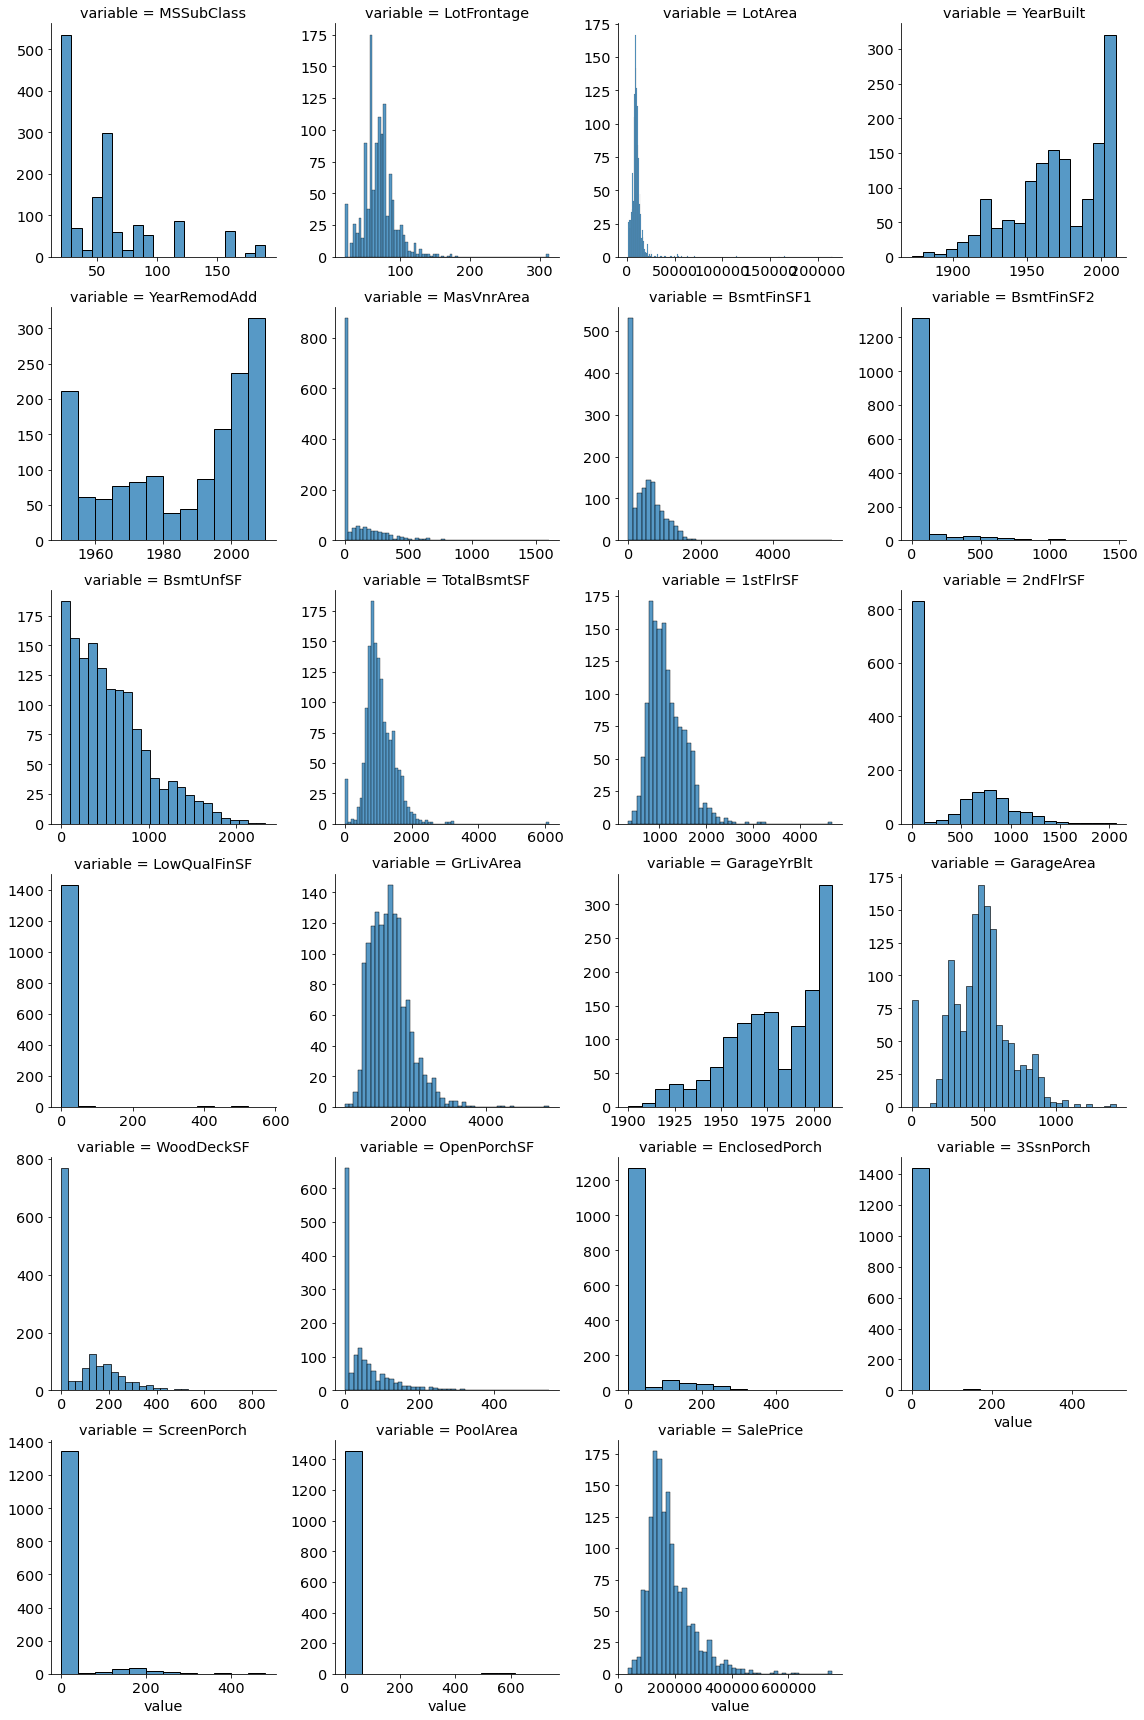

In [23]:
#histograms for numerical variables
NumericData.drop(['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars',
'Fireplaces','MiscVal','MoSold','YrSold'],axis=1,inplace=True)
NumericDataMelt=NumericData.melt()

CatFacetGrid = sns.FacetGrid(NumericDataMelt, col='variable',sharex=False, dropna=True, sharey=False, size=4,col_wrap=4)
#CatFacetGrid.set_xticklabels(rotation=90)
countPlot=CatFacetGrid.map(sns.histplot,'value')
plt.show()

In [24]:
NumericData.shape

(1460, 23)

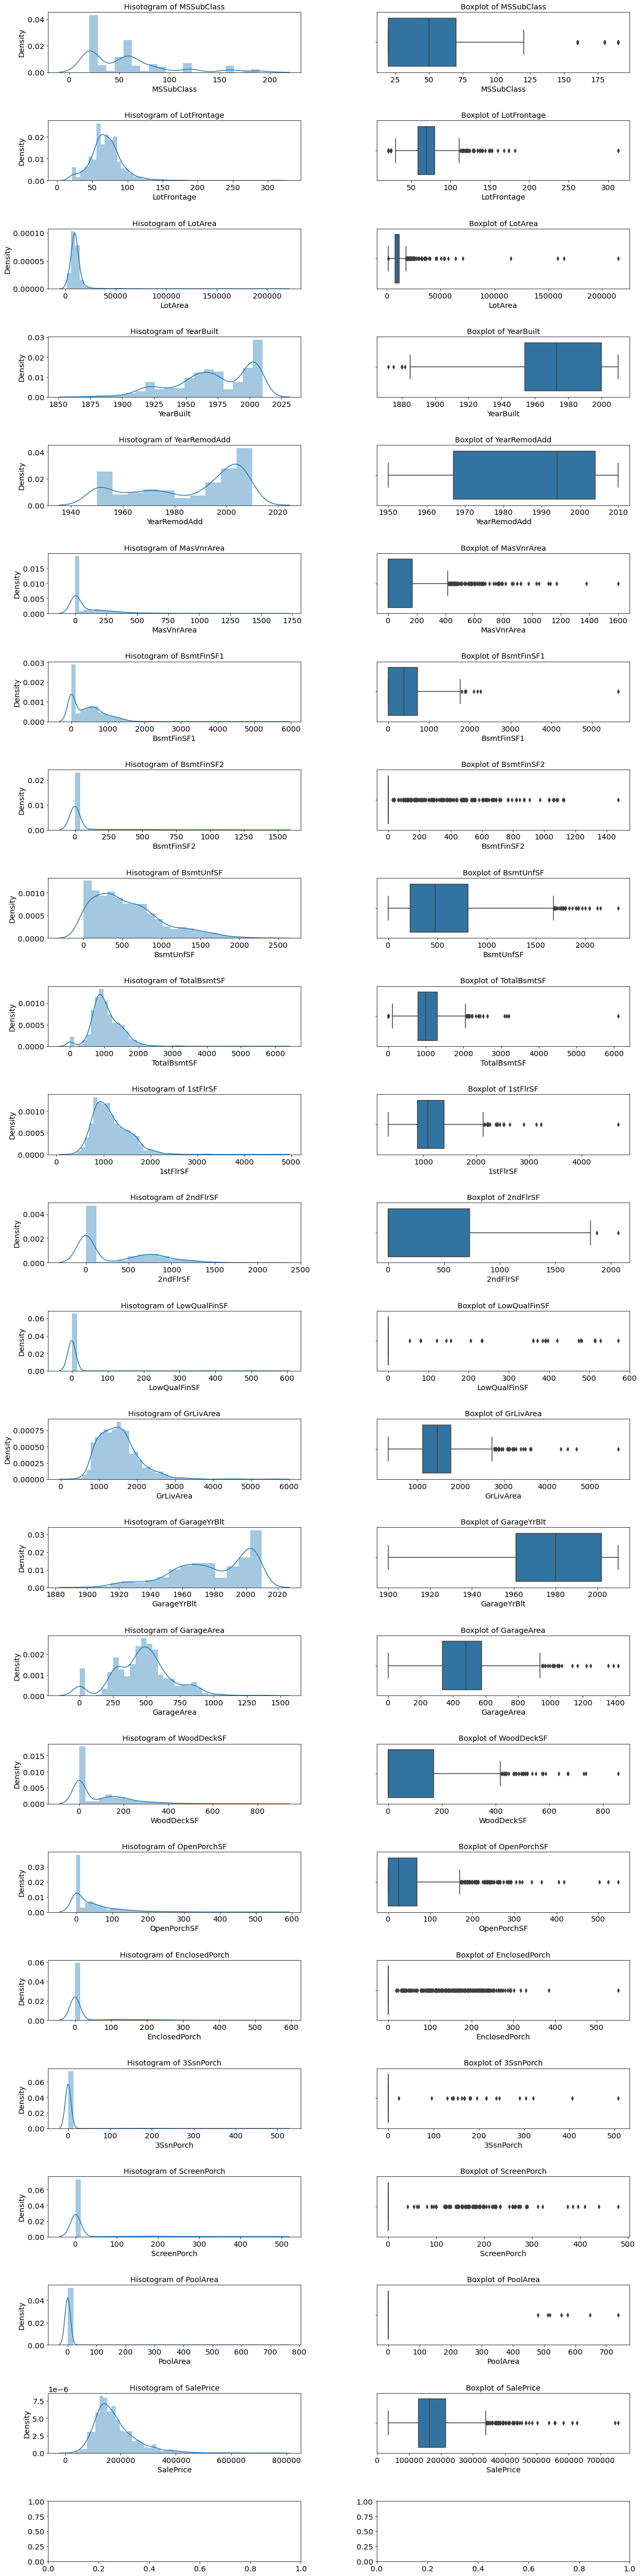

In [25]:
#distplot and boxplots for numerical variables
fig, axes = plt.subplots(nrows=24,ncols=2,  figsize=(20, 90))
fig.subplots_adjust(hspace = .8, wspace=.3)
i = 0
for col in NumericData.columns:
    if NumericData[col].dtype == 'int64' or NumericData[col].dtype == 'float64':
        sns.distplot(NumericData[col], ax=axes[i][0]).set_title("Hisotogram of " + col)
        sns.boxplot(NumericData[col], ax=axes[i][1]).set_title("Boxplot of " + col)
        i = i + 1

# Bivariate Analysis

## Categorical vs Target variable

In [26]:
CategoricalConData.columns

Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageCars', 'Fireplaces', 'GarageType', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot of YrSold')

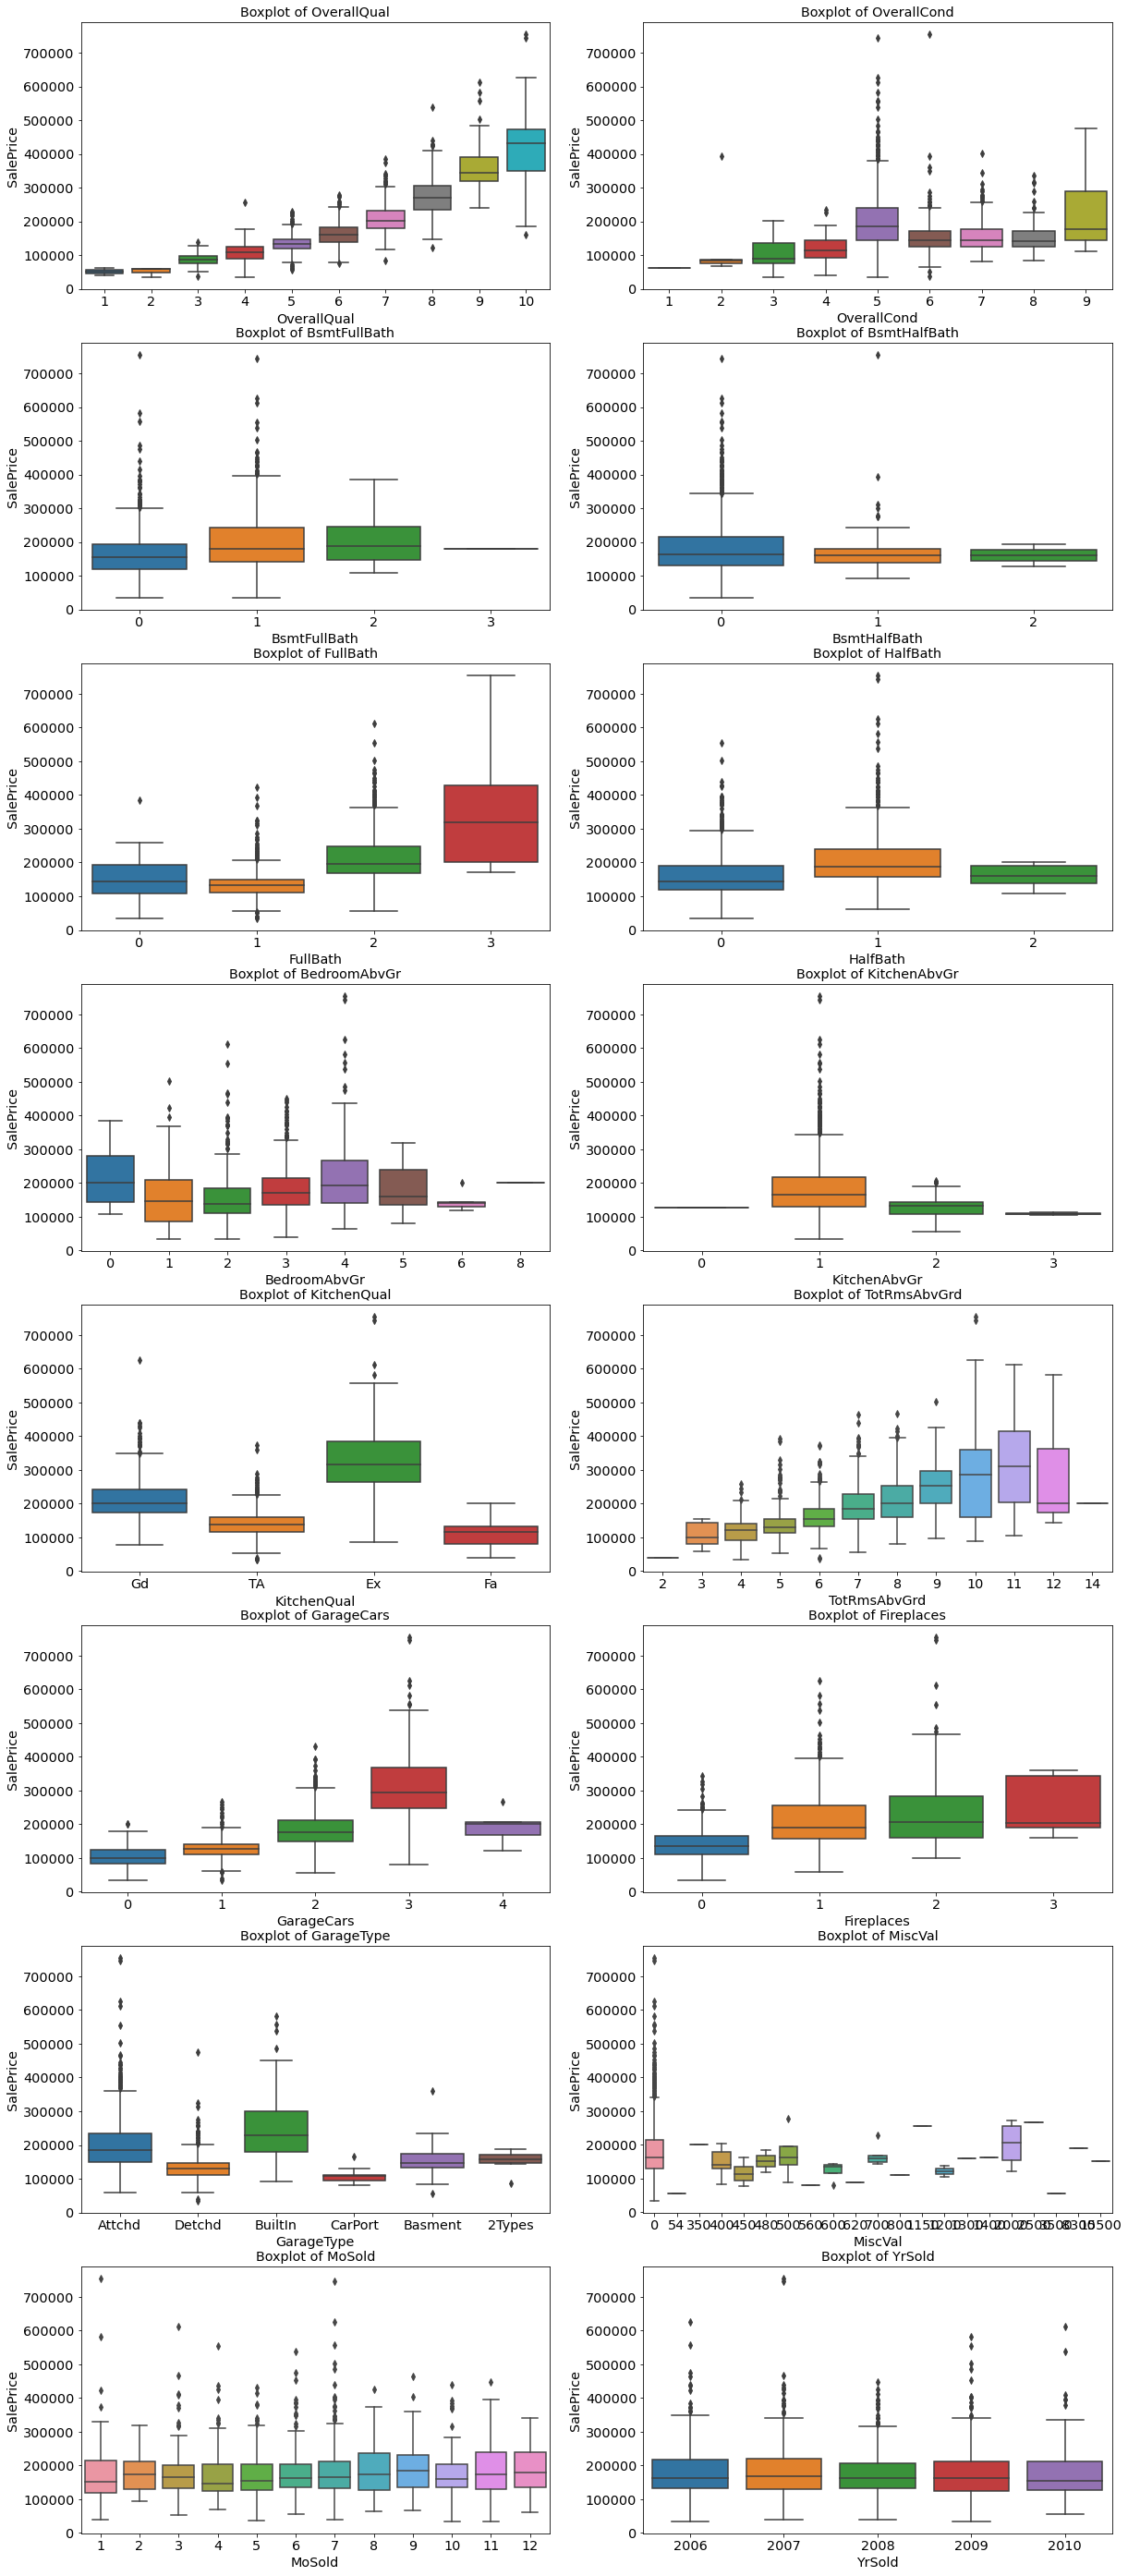

In [27]:
size = (20, 50)
CategoricalConData['SalePrice']=Train['SalePrice']

fig, axs = plt.subplots(ncols=2,nrows=8,figsize=size)
fig.subplots_adjust(hspace = .2, wspace=.2)

sns.boxplot(x=CategoricalConData['OverallQual'],y=CategoricalConData['SalePrice'],ax=axs[0][0], ).set_title("Boxplot of OverallQual")
sns.boxplot(x=CategoricalConData['OverallCond'],y=CategoricalConData['SalePrice'],ax=axs[0][1] ).set_title("Boxplot of OverallCond")

sns.boxplot(x=CategoricalConData['BsmtFullBath'],y=CategoricalConData['SalePrice'],ax=axs[1][0], ).set_title("Boxplot of BsmtFullBath")
sns.boxplot(x=CategoricalConData['BsmtHalfBath'],y=CategoricalConData['SalePrice'],ax=axs[1][1] ).set_title("Boxplot of BsmtHalfBath")

sns.boxplot(x=CategoricalConData['FullBath'],y=CategoricalConData['SalePrice'],ax=axs[2][0], ).set_title("Boxplot of FullBath")
sns.boxplot(x=CategoricalConData['HalfBath'],y=CategoricalConData['SalePrice'],ax=axs[2][1] ).set_title("Boxplot of HalfBath")

sns.boxplot(x=CategoricalConData['BedroomAbvGr'],y=CategoricalConData['SalePrice'],ax=axs[3][0], ).set_title("Boxplot of BedroomAbvGr")
sns.boxplot(x=CategoricalConData['KitchenAbvGr'],y=CategoricalConData['SalePrice'],ax=axs[3][1] ).set_title("Boxplot of KitchenAbvGr")

sns.boxplot(x=CategoricalConData['KitchenQual'],y=CategoricalConData['SalePrice'],ax=axs[4][0], ).set_title("Boxplot of KitchenQual")
sns.boxplot(x=CategoricalConData['TotRmsAbvGrd'],y=CategoricalConData['SalePrice'],ax=axs[4][1] ).set_title("Boxplot of TotRmsAbvGrd")

sns.boxplot(x=CategoricalConData['GarageCars'],y=CategoricalConData['SalePrice'],ax=axs[5][0], ).set_title("Boxplot of GarageCars")
sns.boxplot(x=CategoricalConData['Fireplaces'],y=CategoricalConData['SalePrice'],ax=axs[5][1] ).set_title("Boxplot of Fireplaces")

sns.boxplot(x=CategoricalConData['GarageType'],y=CategoricalConData['SalePrice'],ax=axs[6][0], ).set_title("Boxplot of GarageType")
sns.boxplot(x=CategoricalConData['MiscVal'],y=CategoricalConData['SalePrice'],ax=axs[6][1] ).set_title("Boxplot of MiscVal")

sns.boxplot(x=CategoricalConData['MoSold'],y=CategoricalConData['SalePrice'],ax=axs[7][0], ).set_title("Boxplot of MoSold")
sns.boxplot(x=CategoricalConData['YrSold'],y=CategoricalConData['SalePrice'],ax=axs[7][1] ).set_title("Boxplot of YrSold")

In [28]:
CategoricData['SalePrice']=Train['SalePrice'].copy()

[Text(0, 0, 'VinylSd'),
 Text(1, 0, 'MetalSd'),
 Text(2, 0, 'Wd Shng'),
 Text(3, 0, 'HdBoard'),
 Text(4, 0, 'Plywood'),
 Text(5, 0, 'Wd Sdng'),
 Text(6, 0, 'CmentBd'),
 Text(7, 0, 'BrkFace'),
 Text(8, 0, 'Stucco'),
 Text(9, 0, 'AsbShng'),
 Text(10, 0, 'Brk Cmn'),
 Text(11, 0, 'ImStucc'),
 Text(12, 0, 'AsphShn'),
 Text(13, 0, 'Stone'),
 Text(14, 0, 'Other'),
 Text(15, 0, 'CBlock')]

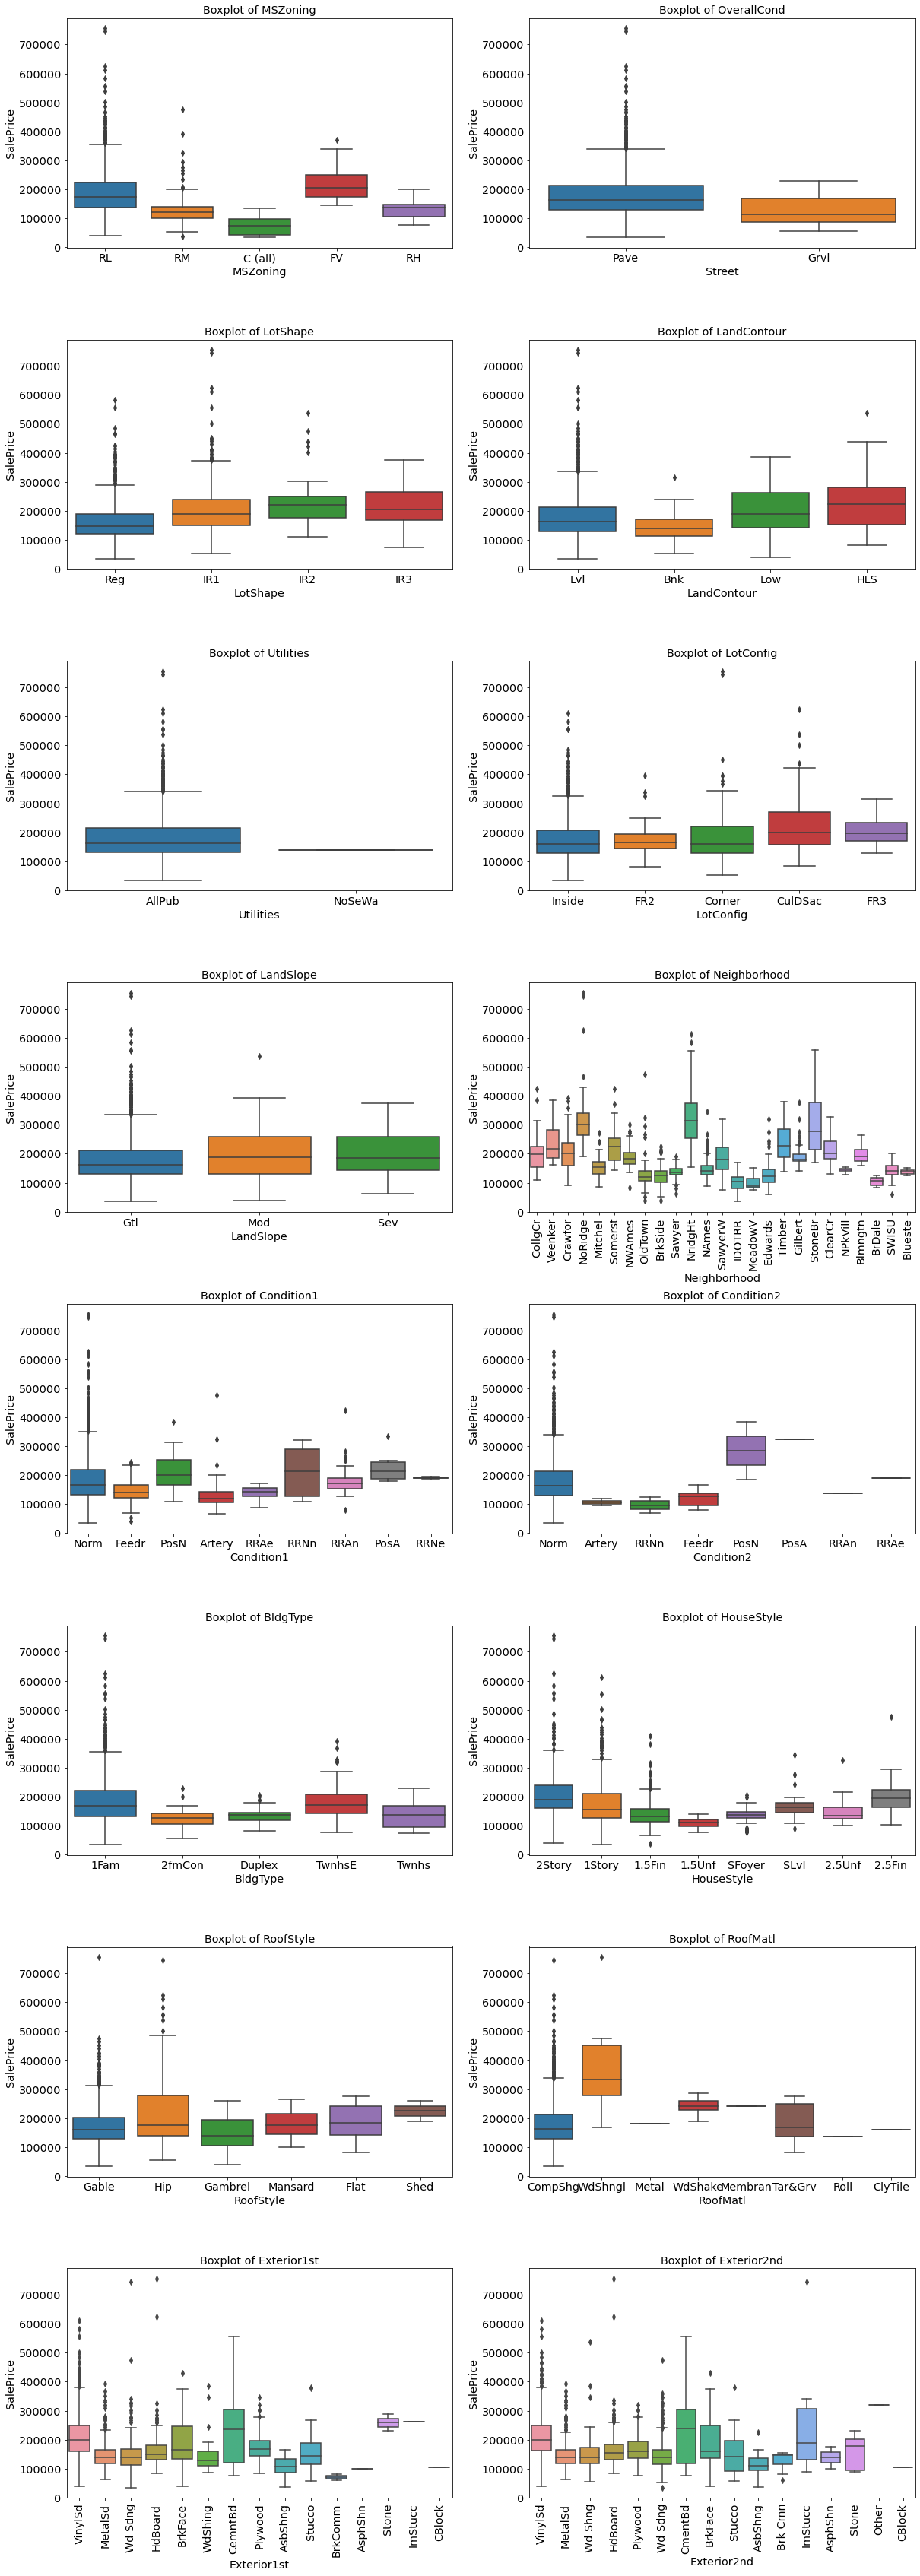

In [29]:
size = (20, 60)

fig, axs = plt.subplots(ncols=2,nrows=8,figsize=size)
fig.subplots_adjust(hspace = .4, wspace=.2)

sns.boxplot(x=CategoricData['MSZoning'],y=CategoricData['SalePrice'],ax=axs[0][0], ).set_title("Boxplot of MSZoning")
sns.boxplot(x=CategoricData['Street'],y=CategoricData['SalePrice'],ax=axs[0][1] ).set_title("Boxplot of OverallCond")

sns.boxplot(x=CategoricData['LotShape'],y=CategoricData['SalePrice'],ax=axs[1][0], ).set_title("Boxplot of LotShape")
sns.boxplot(x=CategoricData['LandContour'],y=CategoricData['SalePrice'],ax=axs[1][1] ).set_title("Boxplot of LandContour")

sns.boxplot(x=CategoricData['Utilities'],y=CategoricData['SalePrice'],ax=axs[2][0], ).set_title("Boxplot of Utilities")
sns.boxplot(x=CategoricData['LotConfig'],y=CategoricData['SalePrice'],ax=axs[2][1] ).set_title("Boxplot of LotConfig")

sns.boxplot(x=CategoricData['LandSlope'],y=CategoricData['SalePrice'],ax=axs[3][0], ).set_title("Boxplot of LandSlope")
ax=sns.boxplot(x=CategoricData['Neighborhood'],y=CategoricData['SalePrice'],ax=axs[3][1] )
ax.set_title("Boxplot of Neighborhood")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

sns.boxplot(x=CategoricData['Condition1'],y=CategoricData['SalePrice'],ax=axs[4][0], ).set_title("Boxplot of Condition1")
sns.boxplot(x=CategoricData['Condition2'],y=CategoricData['SalePrice'],ax=axs[4][1] ).set_title("Boxplot of Condition2")

sns.boxplot(x=CategoricData['BldgType'],y=CategoricData['SalePrice'],ax=axs[5][0], ).set_title("Boxplot of BldgType")
sns.boxplot(x=CategoricData['HouseStyle'],y=CategoricData['SalePrice'],ax=axs[5][1] ).set_title("Boxplot of HouseStyle")

sns.boxplot(x=CategoricData['RoofStyle'],y=CategoricData['SalePrice'],ax=axs[6][0], ).set_title("Boxplot of RoofStyle")
sns.boxplot(x=CategoricData['RoofMatl'],y=CategoricData['SalePrice'],ax=axs[6][1] ).set_title("Boxplot of RoofMatl")

ax=sns.boxplot(x=CategoricData['Exterior1st'],y=CategoricData['SalePrice'],ax=axs[7][0], )
ax.set_title("Boxplot of Exterior1st")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax=sns.boxplot(x=CategoricData['Exterior2nd'],y=CategoricData['SalePrice'],ax=axs[7][1] )
ax.set_title("Boxplot of Exterior2nd")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

## Continous vs Target variable

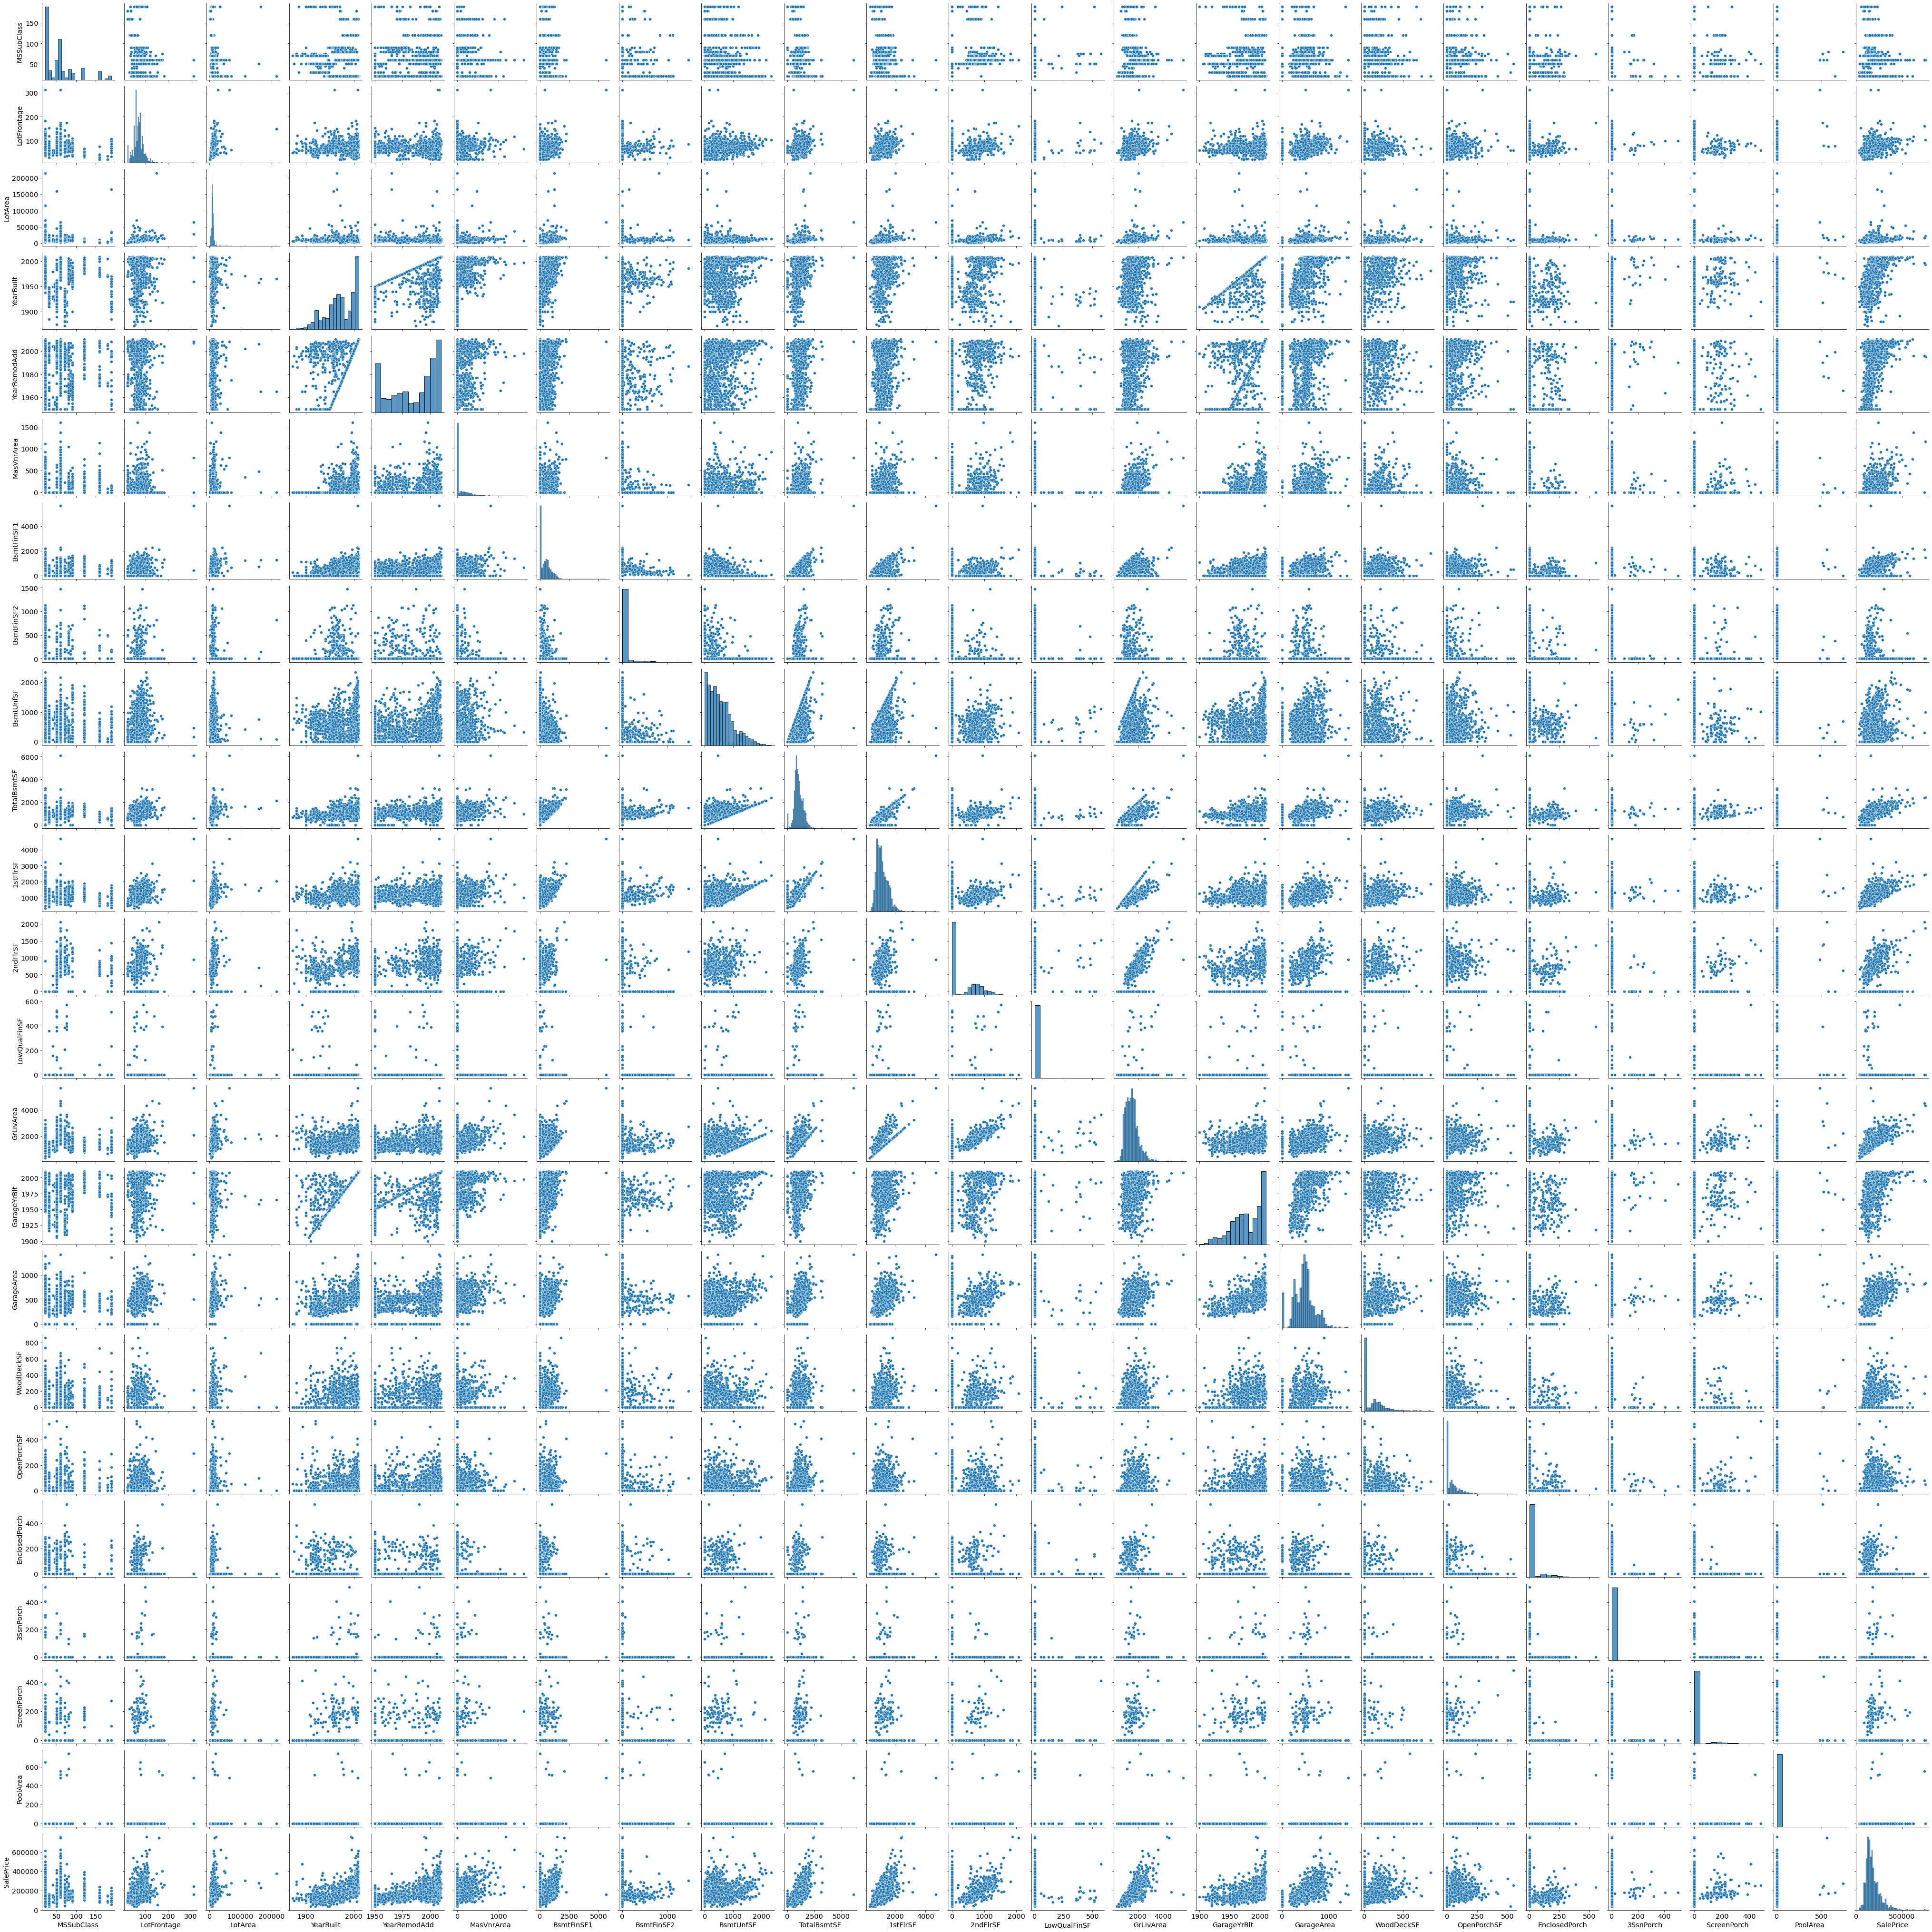

In [30]:
#Bivariate Analysis for actual categorical Variables with Attrition
NumericData['SalePrice']=Train['SalePrice']
sns.pairplot(NumericData)

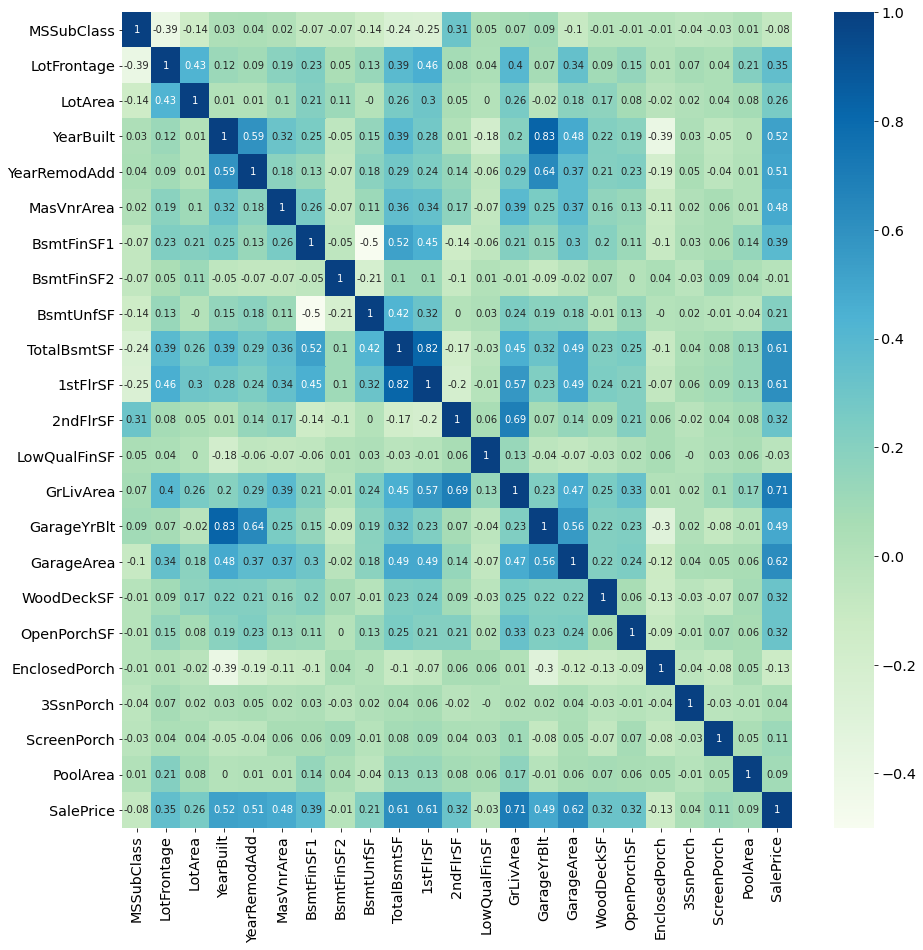

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(round(NumericData.corr(),2),annot=True,mask=None,cmap='GnBu')
plt.show()

## Missing values imputation

In [32]:
# Number of of null values in each column
count=round(Train.isnull().sum(),2)
percent=round((Train.isnull().sum()/Train.shape[0])*100,2)
data=pd.concat([count,percent],axis=1)
data.reset_index(inplace=True)
data.rename(columns={0: 'Missing Values Count',1: 'Missing Values %'},inplace=True)
missingData=data[data['Missing Values Count']!=0]
missingData

index  Missing Values Count  Missing Values %
2    LotFrontage                   259             17.74
23    MasVnrType                     8              0.55
24    MasVnrArea                     8              0.55
28      BsmtQual                    37              2.53
29      BsmtCond                    37              2.53
30  BsmtExposure                    38              2.60
31  BsmtFinType1                    37              2.53
33  BsmtFinType2                    38              2.60
40    Electrical                     1              0.07
55   FireplaceQu                   690             47.26
56    GarageType                    81              5.55
57   GarageYrBlt                    81              5.55
58  GarageFinish                    81              5.55
61    GarageQual                    81              5.55
62    GarageCond                    81              5.55

In [33]:
missingDf=Train[['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].copy()
missingDf

LotFrontage MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0            65.0    BrkFace       196.0       Gd       TA           No   
1            80.0       None         0.0       Gd       TA           Gd   
2            68.0    BrkFace       162.0       Gd       TA           Mn   
3            60.0       None         0.0       TA       Gd           No   
4            84.0    BrkFace       350.0       Gd       TA           Av   
...           ...        ...         ...      ...      ...          ...   
1455         62.0       None         0.0       Gd       TA           No   
1456         85.0      Stone       119.0       Gd       TA           No   
1457         66.0       None         0.0       TA       Gd           No   
1458         68.0       None         0.0       TA       TA           Mn   
1459         75.0       None         0.0       TA       TA           No   

     BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType  GarageYrBlt  \
0             GLQ          Unf      SBrkr         NaN     Attchd       2003.0   
1             ALQ          Unf      SBrkr          TA     Attchd       1976.0   
2             GLQ          Unf      SBrkr          TA     Attchd       2001.0   
3             ALQ          Unf      SBrkr          Gd     Detchd       1998.0   
4             GLQ          Unf      SBrkr          TA     Attchd       2000.0   
...           ...          ...        ...         ...        ...          ...   
1455          Unf          Unf      SBrkr          TA     Attchd       1999.0   
1456          ALQ          Rec      SBrkr          TA     Attchd       1978.0   
1457          GLQ          Unf      SBrkr          Gd     Attchd       1941.0   
1458          GLQ          Rec      FuseA         NaN     Attchd       1950.0   
1459          BLQ          LwQ      SBrkr         NaN     Attchd       1965.0   

     GarageFinish GarageQual GarageCond  
0             RFn         TA         TA  
1             RFn         TA         TA  
2             RFn         TA         TA  
3             Unf         TA         TA  
4             RFn         TA         TA  
...           ...        ...        ...  
1455          RFn         TA         TA  
1456          Unf         TA         TA  
1457          RFn         TA         TA  
1458          Unf         TA         TA  
1459          Fin         TA         TA  

[1460 rows x 15 columns]

<AxesSubplot:>

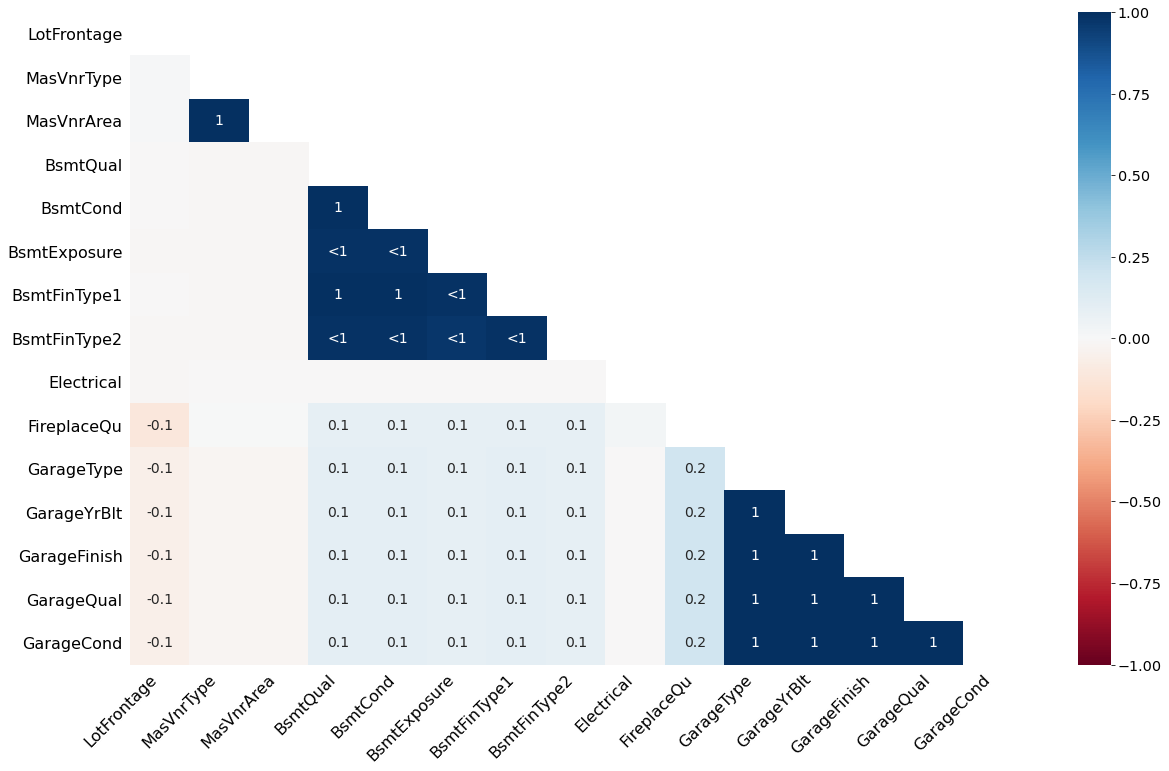

In [36]:
msno.heatmap(Train[missingDf.columns])

In [37]:
# filling a null values of 'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' using fillna()  andupdating as 'No Garage'
Train["GarageType"].fillna("No Garage", inplace = True)  
Train["GarageYrBlt"].fillna("No Garage", inplace = True)  
Train["GarageFinish"].fillna("No Garage", inplace = True)  
Train["GarageQual"].fillna("No Garage", inplace = True)  
Train["GarageCond"].fillna("No Garage", inplace = True)  

In [38]:
# filling a null values of 'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' using fillna()  andupdating as 'No Garage'
Test["GarageType"].fillna("No Garage", inplace = True)  
Test["GarageYrBlt"].fillna("No Garage", inplace = True)  
Test["GarageFinish"].fillna("No Garage", inplace = True)  
Test["GarageQual"].fillna("No Garage", inplace = True)  
Test["GarageCond"].fillna("No Garage", inplace = True)  

In [39]:
# filling a null values of 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2' using fillna()  and updating as 'No Basement'
Train["BsmtQual"].fillna("No Basement", inplace = True)  
Train["BsmtCond"].fillna("No Basement", inplace = True)  
Train["BsmtExposure"].fillna("No Basement", inplace = True)  
Train["BsmtFinType1"].fillna("No Basement", inplace = True)  
Train["BsmtFinType2"].fillna("No Basement", inplace = True)

In [40]:
# filling a null values of 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2' using fillna()  and updating as 'No Basement'
Test["BsmtQual"].fillna("No Basement", inplace = True)  
Test["BsmtCond"].fillna("No Basement", inplace = True)  
Test["BsmtExposure"].fillna("No Basement", inplace = True)  
Test["BsmtFinType1"].fillna("No Basement", inplace = True)  
Test["BsmtFinType2"].fillna("No Basement", inplace = True)

In [41]:
# filling a null values of 'MasVnrType','MasVnrArea' using fillna()  and updating as 'No None'
Train["MasVnrType"].fillna("None", inplace = True)  
Train["MasVnrArea"].fillna("None", inplace = True)  

In [42]:
# filling a null values of 'MasVnrType','MasVnrArea' using fillna()  and updating as 'No None'
Test["MasVnrType"].fillna("None", inplace = True)  
Test["MasVnrArea"].fillna("None", inplace = True)  

In [43]:
# filling a null values of 'Electrical' with mode
Train['Electrical'].fillna(Train['Electrical'].mode()[0], inplace=True)

In [44]:
# filling a null values of 'Electrical' with mode
Test['Electrical'].fillna(Train['Electrical'].mode()[0], inplace=True)

In [45]:
# filling a null values of 'FireplaceQu' using fill na and updating as 'No Fireplace'
Train["FireplaceQu"].fillna("No Fireplace", inplace = True)  

In [46]:
# filling a null values of 'FireplaceQu' using fill na and updating as 'No Fireplace'
Test["FireplaceQu"].fillna("No Fireplace", inplace = True)  

In [47]:
Train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [48]:
# filling a null values of 'LotFrontage' with mean
Train['LotFrontage'].fillna(Train['LotFrontage'].mean(), inplace=True)

In [49]:
# filling a null values of 'LotFrontage' with mean
Test['LotFrontage'].fillna(Test['LotFrontage'].mean(), inplace=True)

In [ ]:
# # filling a null values of 'LotFrontage' with mean
# Train['LotFrontage'].fillna(Train['LotFrontage'].mean(), inplace=True)

In [50]:
# Number of of null values in each column after imputation
count=round(Train.isnull().sum(),2)
percent=round((Train.isnull().sum()/Train.shape[0])*100,2)
data=pd.concat([count,percent],axis=1)
data.reset_index(inplace=True)
data.rename(columns={0: 'Missing Values Count',1: 'Missing Values %'},inplace=True)
missingData=data[data['Missing Values Count']!=0]
missingData

Empty DataFrame
Columns: [index, Missing Values Count, Missing Values %]
Index: []

In [51]:
missing=Test[['MSZoning','Utilities','Exterior1st','Exterior2nd','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','GarageArea','SaleType']].copy()
missing

MSZoning Utilities Exterior1st Exterior2nd  TotalBsmtSF  BsmtFullBath  \
0          RH    AllPub     VinylSd     VinylSd        882.0           0.0   
1          RL    AllPub     Wd Sdng     Wd Sdng       1329.0           0.0   
2          RL    AllPub     VinylSd     VinylSd        928.0           0.0   
3          RL    AllPub     VinylSd     VinylSd        926.0           0.0   
4          RL    AllPub     HdBoard     HdBoard       1280.0           0.0   
...       ...       ...         ...         ...          ...           ...   
1454       RM    AllPub     CemntBd     CmentBd        546.0           0.0   
1455       RM    AllPub     CemntBd     CmentBd        546.0           0.0   
1456       RL    AllPub     VinylSd     VinylSd       1224.0           1.0   
1457       RL    AllPub     HdBoard     Wd Shng        912.0           0.0   
1458       RL    AllPub     HdBoard     HdBoard        996.0           0.0   

      BsmtHalfBath KitchenQual Functional  GarageArea SaleType  
0              0.0          TA        Typ       730.0       WD  
1              0.0          Gd        Typ       312.0       WD  
2              0.0          TA        Typ       482.0       WD  
3              0.0          Gd        Typ       470.0       WD  
4              0.0          Gd        Typ       506.0       WD  
...            ...         ...        ...         ...      ...  
1454           0.0          TA        Typ         0.0       WD  
1455           0.0          TA        Typ       286.0       WD  
1456           0.0          TA        Typ       576.0       WD  
1457           1.0          TA        Typ         0.0       WD  
1458           0.0          TA        Typ       650.0       WD  

[1459 rows x 11 columns]

In [52]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   Utilities     1457 non-null   object 
 2   Exterior1st   1458 non-null   object 
 3   Exterior2nd   1458 non-null   object 
 4   TotalBsmtSF   1458 non-null   float64
 5   BsmtFullBath  1457 non-null   float64
 6   BsmtHalfBath  1457 non-null   float64
 7   KitchenQual   1458 non-null   object 
 8   Functional    1457 non-null   object 
 9   GarageArea    1458 non-null   float64
 10  SaleType      1458 non-null   object 
dtypes: float64(4), object(7)
memory usage: 125.5+ KB


In [53]:
# filling a null values of 'LotFrontage' with mean
Test['TotalBsmtSF'].fillna(Test['TotalBsmtSF'].mean(), inplace=True)
# filling a null values of 'LotFrontage' with mean
Test['GarageArea'].fillna(Test['GarageArea'].mean(), inplace=True)

In [54]:
Test = Test.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [55]:
# Number of of null values in each column after imputation
count=round(Test.isnull().sum(),2)
percent=round((Test.isnull().sum()/Test.shape[0])*100,2)
data=pd.concat([count,percent],axis=1)
data.reset_index(inplace=True)
data.rename(columns={0: 'Missing Values Count',1: 'Missing Values %'},inplace=True)
missingData=data[data['Missing Values Count']!=0]
missingData

Empty DataFrame
Columns: [index, Missing Values Count, Missing Values %]
Index: []

# Feature Selection

In [56]:
CategoricData=Train.select_dtypes(include=['object','category'])
rows,col=(CategoricData.shape)
print("Number of Categorical columns are:",col)
print(CategoricData.columns)

Number of Categorical columns are: 41
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [ ]:
# #Displaying the number of occurences for each categorical variable
# CatCol = CategoricData.select_dtypes(include = "object").columns
# print(CatCol)
# print("\n")
# for col in CatCol:
#     print(CategoricData[col].value_counts())
#     print("\n")

In [ ]:
# #taking databackup into temp for plotting a correlation plot
# temp=CategoricData.copy()

# #selecting only categorical variables for Label encoding
# CatCol = temp.select_dtypes(include = "object").columns
# print(CatCol)

# #instantiating LabelEncoder() object
# le = LabelEncoder()

# #Label encoding the categorical columns by converting them into string type
# for feat in CatCol:
#     temp[feat] = le.fit_transform(temp[feat].astype(str))

# #plottting correlational plot checking Correlations and dependencies for imputation
# plt.figure(figsize=(25,15))
# sns.heatmap(round(temp.corr(method='kendall'),2),annot=True,mask=None,cmap='GnBu')
# plt.show()

In [ ]:
# #plottting correlational plot checking Correlations and dependencies for imputation
# plt.figure(figsize=(25,15))
# sns.heatmap(round(NumericData.corr(method='pearson'),2),annot=True,mask=None,cmap='GnBu')
# plt.show()

In [ ]:
# NumericData=Train.select_dtypes(include=['float64','int64'])
# # NumericData.drop(['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars',
# # 'Fireplaces','MiscVal','MoSold','YrSold'],axis=1,inplace=True)
# NumericData.isnull().sum()

# NumericData.drop(['SalePrice','BsmtUnfSF','2ndFlrSF','YrSold','YearRemodAdd'],axis=1,inplace=True)
# #checking for presence onf multi-collieanrity
# vif=pd.DataFrame()
# vif['Features']=NumericData.columns
# vif['VIF']=[variance_inflation_factor(NumericData.values,i) for i in range(NumericData.shape[1])]
# vif['VIF']=round(vif['VIF'],2)
# vif=vif.sort_values(by="VIF",ascending=False)
# vif

### One hot encoding for categorical data



In [57]:
Train.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotRmsAbvGrd','GarageCars'],axis=1,inplace=True)
Test.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotRmsAbvGrd','GarageCars'],axis=1,inplace=True)

In [58]:
#taking databackup 
Train_bkup=Train.copy()
temp=CategoricData.copy()

In [59]:
Train_bkup.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],axis=1,inplace=True)

In [60]:
#taking databackup 
Test_bkup=Test.copy()

In [61]:
Test_bkup.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],axis=1,inplace=True)

In [62]:
CategoricDataT=Test.select_dtypes(include=['object','category'])
rows,col=(CategoricDataT.shape)
print("Number of Categorical columns are:",col)
print(CategoricDataT.columns)

Number of Categorical columns are: 41
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [63]:
tempT=CategoricDataT.copy()

In [64]:
oheDataT=pd.get_dummies(tempT,drop_first=True)

In [65]:
oheData=pd.get_dummies(temp,drop_first=True)

In [66]:
oheData.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=634)

In [67]:
Train_bkup.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [68]:
#concatenating with categoricalEncoded DF
oheData=pd.concat([oheData,Train_bkup],axis=1)

In [69]:
#concatenating with categoricalEncoded DF
oheDataT=pd.concat([oheDataT,Test_bkup],axis=1)

In [70]:
#one hot encoded dataframe shape
oheData.shape

(1460, 661)

In [71]:
oheDataT.shape

(1459, 620)

In [72]:
#taking backup of oheDataDF
oheDataDF=oheData.copy()

In [ ]:
# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [ ]:
# #Panda Profiling gives almost all the data analysis required for the EDA
# pandas_profiling.ProfileReport(CategoricData)

# Method:1 Correlation heatmap

In [73]:
CategoricData.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [74]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [75]:
corr_features = correlation(NumericData, 0.8)
len(set(corr_features))

2

In [76]:
corr_features

{'1stFlrSF', 'GarageYrBlt'}

In [77]:
NumericData=Train.select_dtypes(include=['float64','int64'])

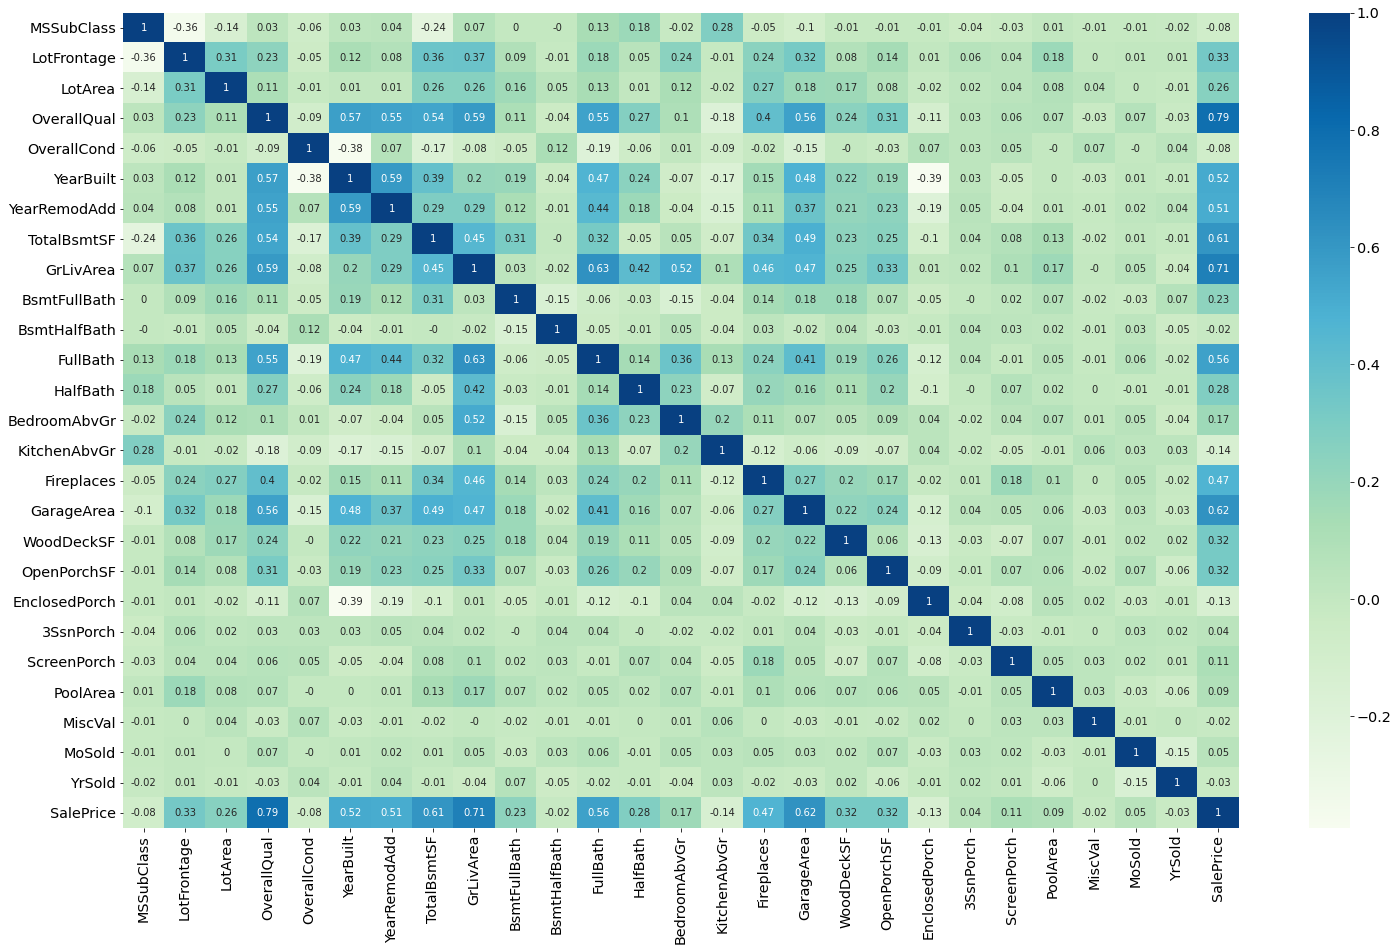

In [78]:
plt.figure(figsize=(25,15))
sns.heatmap(round(NumericData.corr(method='pearson'),2),annot=True,mask=None,cmap='GnBu')
plt.show()

From correlation heatmap below we understand variables are having high correlation

1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'}

# Method:2 VIF values

In [79]:
NumericData

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  TotalBsmtSF  GrLivArea  BsmtFullBath  ...  WoodDeckSF  \
0             2003          856       1710             1  ...           0   
1             1976         1262       1262             0  ...         298   
2             2002          920       1786             1  ...           0   
3             1970          756       1717             1  ...           0   
4             2000         1145       2198             1  ...         192   
...            ...          ...        ...           ...  ...         ...   
1455          2000          953       1647             0  ...           0   
1456          1988         1542       2073             1  ...         349   
1457          2006         1152       2340             0  ...           0   
1458          1996         1078       1078             1  ...         366   
1459          1965         1256       1256             1  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 27 columns]

In [80]:
#checking for presence onf multi-collieanrity
vif=pd.DataFrame()
vif['Features']=NumericData.columns
vif['VIF']=[variance_inflation_factor(NumericData.values,i) for i in range(NumericData.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features       VIF
25         YrSold  22245.51
6    YearRemodAdd  20026.93
5       YearBuilt  17046.18
3     OverallQual     74.50
8       GrLivArea     54.50
4     OverallCond     40.44
14   KitchenAbvGr     32.60
26      SalePrice     31.42
11       FullBath     25.89
13   BedroomAbvGr     24.15
1     LotFrontage     17.36
7     TotalBsmtSF     16.10
16     GarageArea     11.06
24         MoSold      6.62
0      MSSubClass      4.47
15     Fireplaces      2.86
12       HalfBath      2.81
2         LotArea      2.66
9    BsmtFullBath      2.25
17     WoodDeckSF      1.90
18    OpenPorchSF      1.80
19  EnclosedPorch      1.43
21    ScreenPorch      1.19
10   BsmtHalfBath      1.14
22       PoolArea      1.09
23        MiscVal      1.03
20      3SsnPorch      1.03

1stFlrSF+ 2ndFlrSF + LowQualFinSF= GrLivArea	
BsmtFinSF1	+ BsmtFinSF2 + BsmtUnfSF = TotalBsmtSF

6 variables can be dropped

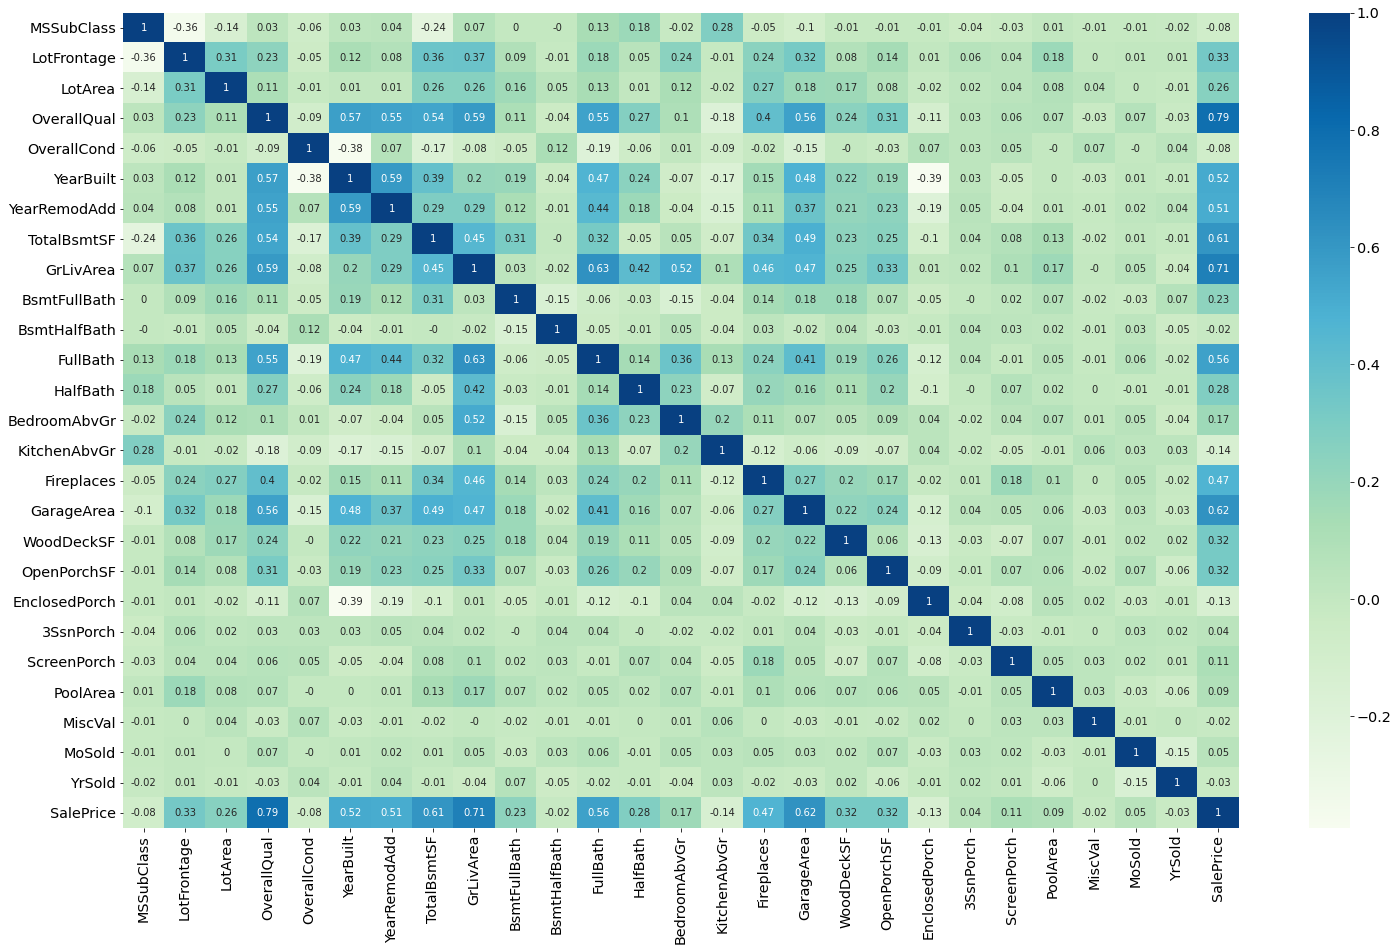

In [81]:
#plotting after droppping
NumericData=Train.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(25,15))
sns.heatmap(round(NumericData.corr(method='pearson'),2),annot=True,mask=None,cmap='GnBu')
plt.show()

# Method 3: VarianceThreshold

In [82]:
oheDataDF.shape

(1460, 661)

In [83]:
oheDataDF.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object', length=661)

In [84]:
X=oheDataDF.drop(labels=['SalePrice'], axis=1)
y=oheDataDF['SalePrice']

from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    oheDataDF.drop(labels=['SalePrice'], axis=1),
    oheDataDF['SalePrice'],
    test_size=0.3,
    random_state=55)

In [85]:
var_thres=VarianceThreshold(threshold=0.05)
var_thres.fit(X_train)

VarianceThreshold(threshold=0.05)

In [86]:
### Finding non constant features
sum(var_thres.get_support())

97

In [87]:
# Lets Find non-constant features 
len(X_train.columns[var_thres.get_support()])

97

In [88]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

563


In [89]:
X_train.drop(constant_columns,axis=1,inplace=True)
X_test.drop(constant_columns,axis=1,inplace=True)

In [90]:
print(X_test.shape)
print(y_test.shape)

(438, 97)
(438,)


In [91]:
print(X_train.shape)
print(X_test.shape)

(1022, 97)
(438, 97)


we are left with 97 variables and this can be used for further reduction

# Method 4 :SelectKBest

https://stats.stackexchange.com/questions/204141/difference-between-selecting-features-based-on-f-regression-and-based-on-r2/207396#207396?newreg=bc481cdb1ae54e85acad7fc29d220346

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

for classification score fucntion woould be score_func=chi2

In [92]:
oheDataDF.shape

(1460, 661)

In [ ]:
#  #independent columns
# X = oheDataDF.iloc[:,0:665] 
#  #target column i.e price range
# y = oheDataDF.iloc[:,-1]   

In [93]:
X=X_train.copy()
y=y_train.copy()

In [94]:
#apply SelectKBest class to extract top 10 best features-above 99 features obtained
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)

In [95]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [96]:
#concat two dataframes 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Specs','Score']  
#print 10 best features
print(featureScores.nlargest(15,'Score'))  

                       Specs        Score
74               OverallQual  1669.926119
79                 GrLivArea  1178.462102
78               TotalBsmtSF   727.234929
87                GarageArea   654.428832
33              ExterQual_TA   547.244751
82                  FullBath   432.214070
54            KitchenQual_TA   376.827190
76                 YearBuilt   369.118163
77              YearRemodAdd   346.423905
37          Foundation_PConc   324.725094
32              ExterQual_Gd   303.981098
86                Fireplaces   301.633283
57  FireplaceQu_No Fireplace   291.756273
45          BsmtFinType1_GLQ   277.730003
39               BsmtQual_TA   271.027339


# Method 5: ExtraTreesRegressor

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

In [ ]:
#  #independent columns
# X = oheDataDF.iloc[:,0:665] 
#  #target column i.e price range
# y = oheDataDF.iloc[:,-1]   

In [97]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
# #use inbuilt class feature_importances of tree based classifiers
# print(model.feature_importances_) 

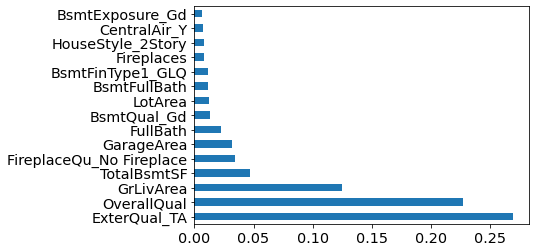

In [98]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [99]:
feat_importances.nlargest(15)

ExterQual_TA                0.269243
OverallQual                 0.226612
GrLivArea                   0.124480
TotalBsmtSF                 0.047090
FireplaceQu_No Fireplace    0.034309
GarageArea                  0.031477
FullBath                    0.022315
BsmtQual_Gd                 0.013213
LotArea                     0.012575
BsmtFullBath                0.011820
BsmtFinType1_GLQ            0.011750
Fireplaces                  0.008552
HouseStyle_2Story           0.007804
CentralAir_Y                0.007650
BsmtExposure_Gd             0.006771
dtype: float64

# Method 6: Mutual Information gain

In [100]:
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.05568499, 0.07747012, 0.06156792, 0.        , 0.02334225,
       0.        , 0.04625995, 0.02724054, 0.03150827, 0.07085804,
       0.02588343, 0.03531317, 0.01290556, 0.        , 0.00143726,
       0.03922781, 0.04717274, 0.04065873, 0.03321707, 0.02975645,
       0.0264809 , 0.00699259, 0.06244687, 0.02585325, 0.00135992,
       0.03675283, 0.        , 0.06940664, 0.02093305, 0.02693736,
       0.08041914, 0.04322454, 0.21701922, 0.25214314, 0.        ,
       0.01408301, 0.0774814 , 0.17439398, 0.15776701, 0.17988817,
       0.00087691, 0.04037979, 0.        , 0.01468995, 0.        ,
       0.10384192, 0.01753317, 0.02861184, 0.00863389, 0.013366  ,
       0.07593529, 0.08070705, 0.06653135, 0.14633072, 0.2262674 ,
       0.0124517 , 0.07296491, 0.1663536 , 0.03530904, 0.12245042,
       0.0194462 , 0.1112576 , 0.04657462, 0.12237285, 0.06434235,
       0.05815276, 0.02889906, 0.0606531 , 0.03545044, 0.        ,
       0.06370297, 0.31359946, 0.21154166, 0.13418252, 0.57299

In [101]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual        0.572993
GrLivArea          0.499987
GarageArea         0.404585
TotalBsmtSF        0.354836
YearBuilt          0.352941
                     ...   
3SsnPorch          0.000000
LandContour_Lvl    0.000000
PoolArea           0.000000
MiscVal            0.000000
MoSold             0.000000
Length: 97, dtype: float64

<AxesSubplot:>

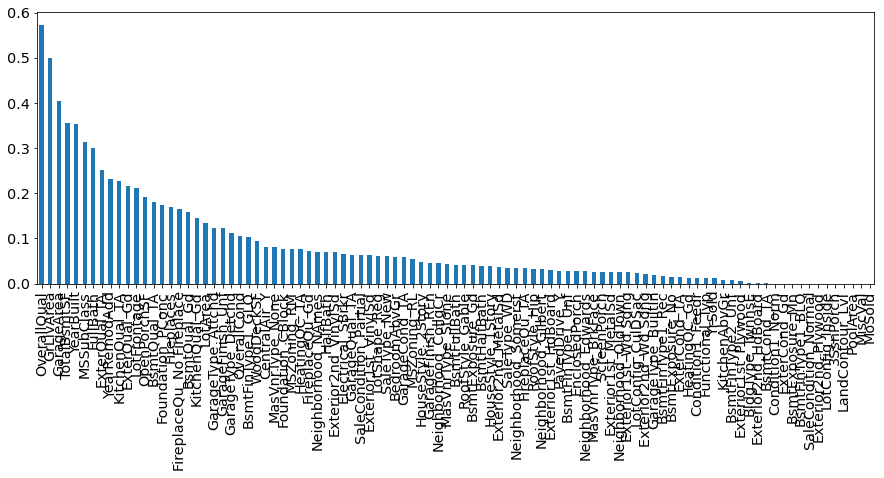

In [102]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [103]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=15)
selected_top_columns.fit(X_train, y_train)
selected_top_columns.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False])

In [104]:
X_train.columns[selected_top_columns.get_support()]

Index(['ExterQual_Gd', 'ExterQual_TA', 'KitchenQual_TA',
       'FireplaceQu_No Fireplace', 'MSSubClass', 'LotFrontage', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'Fireplaces', 'GarageArea', 'OpenPorchSF'],
      dtype='object')

# Method 7: RFE (Recursive Feature Elimination)

In [105]:
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=15)
model = DecisionTreeRegressor()

In [106]:
rfe = RFE(model, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [107]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSZoning_RL', False, 34),
 ('MSZoning_RM', False, 42),
 ('LotShape_Reg', False, 29),
 ('LandContour_Lvl', False, 28),
 ('LotConfig_CulDSac', False, 73),
 ('LotConfig_Inside', False, 46),
 ('Neighborhood_CollgCr', False, 31),
 ('Neighborhood_Edwards', False, 74),
 ('Neighborhood_Gilbert', False, 66),
 ('Neighborhood_NAmes', False, 14),
 ('Neighborhood_OldTown', False, 83),
 ('Neighborhood_Somerst', False, 36),
 ('Condition1_Feedr', False, 79),
 ('Condition1_Norm', False, 38),
 ('BldgType_TwnhsE', False, 50),
 ('HouseStyle_1Story', False, 52),
 ('HouseStyle_2Story', False, 72),
 ('RoofStyle_Gable', False, 20),
 ('RoofStyle_Hip', False, 60),
 ('Exterior1st_HdBoard', False, 69),
 ('Exterior1st_MetalSd', False, 45),
 ('Exterior1st_Plywood', False, 77),
 ('Exterior1st_VinylSd', False, 53),
 ('Exterior1st_Wd Sdng', False, 55),
 ('Exterior2nd_HdBoard', False, 67),
 ('Exterior2nd_MetalSd', False, 6),
 ('Exterior2nd_Plywood', False, 82),
 ('Exterior2nd_VinylSd', False, 25),
 ('Exterior2nd_Wd 

In [108]:
col = X_train.columns[rfe.support_]

In [109]:
X_train.columns[~rfe.support_]

Index(['MSZoning_RL', 'MSZoning_RM', 'LotShape_Reg', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_Inside', 'Neighborhood_CollgCr',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_NAmes',
       'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Condition1_Feedr',
       'Condition1_Norm', 'BldgType_TwnhsE', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard',
       'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Gd',
       'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_No', 'BsmtFinType1_BLQ', 

In [110]:
col

Index(['BsmtFinType1_GLQ', 'CentralAir_Y', 'KitchenQual_Gd', 'LotFrontage',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'GarageArea', 'WoodDeckSF',
       'MoSold'],
      dtype='object')

# Method 8: Forward feature Selection

https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

In [111]:
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=15,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [112]:
#fitting and predicting for top 15 features
sfs.fit(X, y)
sfs.k_feature_names_

('Neighborhood_OldTown',
 'Exterior1st_Plywood',
 'BsmtExposure_Gd',
 'BsmtFinType1_GLQ',
 'Functional_Typ',
 'SaleType_New',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'TotalBsmtSF',
 'GrLivArea',
 'BedroomAbvGr',
 'GarageArea',
 'PoolArea')

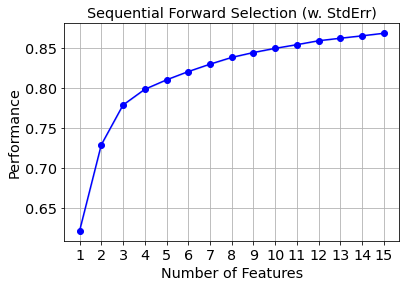

In [113]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

# Method 9: Backward elimination

In [118]:
sbs = SFS(LinearRegression(),
         k_features=15,
         forward=False,
         floating=False,
         cv=0)


In [119]:
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=15)

In [120]:
sbs.k_feature_names_

('BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtExposure_Gd',
 'BsmtFinType1_Unf',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Typ',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'TotalBsmtSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr')

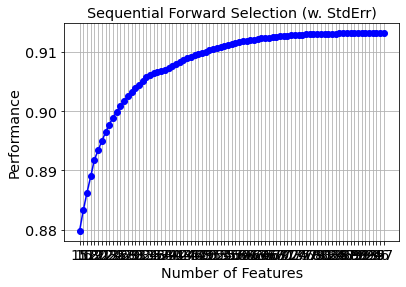

In [123]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

# Method 10: Bidirectional/Step-wise feature Elimination

In [124]:
sffs = SFS(LinearRegression(),
         k_features=(3,15),
         forward=True,
         floating=True,
         cv=0)

In [125]:
sffs.fit(X, y)
sffs.k_feature_names_

('Neighborhood_OldTown',
 'Exterior1st_Plywood',
 'BsmtExposure_Gd',
 'BsmtFinType1_GLQ',
 'Functional_Typ',
 'SaleType_New',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'TotalBsmtSF',
 'GrLivArea',
 'BedroomAbvGr',
 'GarageArea',
 'PoolArea')

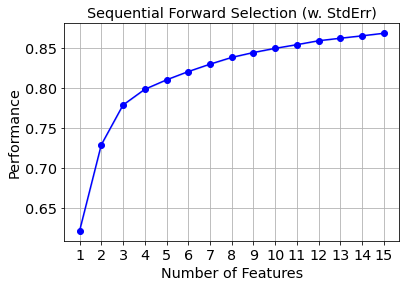

In [126]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sffs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

#Model Building

## Decision Tree

In [ ]:
# Function to check performance metrics
def check_performance(model):
  print("Train_R_squared =", model.best_estimator_.score(X_train, y_train)) 
  print("Test_R_squared =", model.best_estimator_.score(X_test, y_test))  
  print("RMSE_train =", np.sqrt(mean_squared_error(y_train, model.best_estimator_.predict(X_train))))
  print("RMSE_test = ", np.sqrt(mean_squared_error(y_test, model.best_estimator_.predict(X_test))))
  print("MAPE_train =", mean_absolute_percentage_error(y_train, model.best_estimator_.predict(X_train)))
  print("MAPE_test = ", mean_absolute_percentage_error(y_test, model.best_estimator_.predict(X_test)))

In [ ]:
# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred =  np.array(y_true), np.array(pd.DataFrame(y_pred))
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# # Building Decision Tree Regressor
# DTR = DecisionTreeRegressor(random_state=123)
# DTR.fit(X_train,y_train)

In [ ]:
# print(X_train.shape)
# print(y_train.shape)

In [ ]:
# #Using the model to predict on test data
# y_pred_dt = decisionTree.predict(X_test)

In [ ]:
# %%time
# param_grid = {
#               'max_depth' : [4,6,8,10,12],
#               'min_samples_leaf' : [20,30,40,50], # 1-3% of length of dataset
#               'min_samples_split' : [40,60,80]
#              }

# DTR = DecisionTreeRegressor(random_state=123)

# DT_random = RandomizedSearchCV(estimator = DTR, param_distributions = param_grid, cv = 3)

# DT_random.fit(X_train,y_train)

In [ ]:
# # Best parameters
# DT_random.best_params_

In [ ]:
# check_performance(DT_random)

In [ ]:
DT_Train=X_train[['ExterQual_Gd',
'ExterQual_TA',
'KitchenQual_TA',
'LotArea',
'MSSubClass',
'LotFrontage',
'OverallQual',
'YearBuilt',
'YearRemodAdd',
'TotalBsmtSF',
'GrLivArea',
'FullBath',
'Fireplaces',
'GarageArea',
'OpenPorchSF'
 ]].copy()



In [ ]:
 DT_Test=X_test[['ExterQual_Gd',
'ExterQual_TA',
'KitchenQual_TA',
'LotArea',
'MSSubClass',
'LotFrontage',
'OverallQual',
'YearBuilt',
'YearRemodAdd',
'TotalBsmtSF',
'GrLivArea',
'FullBath',
'Fireplaces',
'GarageArea',
'OpenPorchSF'
 ]].copy()

In [ ]:
y_train_log=np.log(y_train)

In [ ]:
y_test_log=np.log(y_test)

In [ ]:
# Building Decision Tree Regressor
DTR = DecisionTreeRegressor(random_state=123)
DTR.fit(DT_Train,y_train_log)

In [ ]:
print(DT_Train.shape)
print(y_train_log.shape)

In [ ]:
print(DT_Test.shape)
print(y_test_log.shape)

In [ ]:
#Using the model to predict on test data
y_pred_dt = DTR.predict(DT_Test)

In [ ]:
%%time
param_grid = {
              'max_depth' : [4,6,8,10,12],
              'min_samples_leaf' : [20,30,40,50], # 1-3% of length of dataset
              'min_samples_split' : [40,60,80]
             }

#DTR = DecisionTreeRegressor(random_state=123)

DT_random = RandomizedSearchCV(estimator = DTR, param_distributions = param_grid, cv = 3)

DT_random.fit(DT_Train,y_train_log)

In [ ]:
# Best parameters
DT_random.best_params_

In [ ]:
print("Train_R_squared =", DT_random.best_estimator_.score(DT_Train, y_train_log)) 
print("Test_R_squared =", DT_random.best_estimator_.score(DT_Test, y_test_log))  
print("RMSE_train =", np.sqrt(mean_squared_error(y_train_log, DT_random.best_estimator_.predict(DT_Train))))
print("RMSE_test = ", np.sqrt(mean_squared_error(y_test_log, DT_random.best_estimator_.predict(DT_Test))))
print("MAPE_train =", mean_absolute_percentage_error(y_train_log, DT_random.best_estimator_.predict(DT_Train)))
print("MAPE_test = ", mean_absolute_percentage_error(y_test_log, DT_random.best_estimator_.predict(DT_Test)))

## Random Forest

In [ ]:
# Building Random Forest Regressor
RFR = RandomForestRegressor(random_state=123)
RFR.fit(DT_Train,y_train_log)

In [ ]:
%%time
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
              'max_features' : ['auto', 'sqrt'],
              'max_depth' : np.linspace(1, 20, 20, endpoint=True),
              'min_samples_leaf' : [10,20,30,50,70,90], # 1-3% of length of dataset
              'min_samples_split' : [30,40,50,60,70,80,90], # approx 3 times the min_samples_leaf
             }

RFR = RandomForestRegressor(random_state=123)

RF_random = RandomizedSearchCV(estimator = RFR, param_distributions = param_grid, cv = 3)

RF_random.fit(DT_Train,y_train_log)

In [ ]:
# Best parameters
RF_random.best_params_

In [ ]:
print("Train_R_squared =", DT_random.best_estimator_.score(DT_Train, y_train_log)) 
print("Test_R_squared =", DT_random.best_estimator_.score(DT_Test, y_test_log))  
print("RMSE_train =", np.sqrt(mean_squared_error(y_train_log, DT_random.best_estimator_.predict(DT_Train))))
print("RMSE_test = ", np.sqrt(mean_squared_error(y_test_log, DT_random.best_estimator_.predict(DT_Test))))
print("MAPE_train =", mean_absolute_percentage_error(y_train_log, DT_random.best_estimator_.predict(DT_Train)))
print("MAPE_test = ", mean_absolute_percentage_error(y_test_log, DT_random.best_estimator_.predict(DT_Test)))

#Testing on kaggle test data

In [ ]:
DT_Test1=oheDataT[['ExterQual_Gd',
'ExterQual_TA',
'KitchenQual_TA',
'LotArea',
'MSSubClass',
'LotFrontage',
'OverallQual',
'YearBuilt',
'YearRemodAdd',
'TotalBsmtSF',
'GrLivArea',
'FullBath',
'Fireplaces',
'GarageArea',
'OpenPorchSF'
 ]].copy()

In [ ]:
DT_Test1.isnull().sum()

In [ ]:
#Using the model to predict on test data
y_pred_dt1 = RF_random.predict(DT_Test)

In [ ]:
y_pred_dt1

In [ ]:
dataset = pd.DataFrame({'Column1': y_pred_dt})
dataset

In [ ]:
#download result from colab
dataset.to_csv('result.csv',index=False)
files.download("result.csv")